# Supervised ML & Sentiment Analysis

Em aprendizado de máquina supervisionado, você tem características de entrada X e um conjunto de rótulos Y. Para garantir que você obtenha as previsões mais precisas com base em seus dados, seu objetivo é minimizar suas taxas de erro ou custo o máximo possível. Para isso, você vai executar sua função de predição, que leva em consideração os parâmetros de dados para mapear suas características para os rótulos de saída $ \hat{Y} $. A melhor correspondência entre as características e os rótulos é alcançada quando a diferença entre os valores esperados Y e os valores preditos $ \hat{Y} $ é minimizada. Isso é feito pela função de custo, que compara quão próximos seus valores preditos $ \hat{Y} $ estão dos rótulos Y. Em seguida, você pode atualizar seus parâmetros e repetir todo o processo até que seu custo seja minimizado.

Vamos dar uma olhada na tarefa de classificação de aprendizado supervisionado de análise de sentimentos. Neste exemplo, você tem o tweet "Estou feliz porque estou aprendendo PLN".

O objetivo dessa tarefa é prever se um tweet tem um sentimento positivo ou negativo. E você fará isso começando com um conjunto de treinamento onde os tweets com um sentimento positivo têm um rótulo de um, e os tweets com um sentimento negativo têm um rótulo de zero.

Para essa tarefa, você usará seu classificador de regressão logística, que atribui suas observações a duas classes distintas. Em seguida, mostrarei como fazer isso.

Para começar a construir um classificador de regressão logística capaz de prever os sentimentos de um tweet arbitrário, você primeiro processará os tweets brutos em seus conjuntos de treinamento e extrairá características úteis.

Então, você treinará seu classificador de regressão logística enquanto minimiza o custo. E, finalmente, você poderá fazer suas previsões. Neste vídeo, você aprendeu sobre os passos necessários para classificar um tweet. Dado o tweet, você deve classificá-lo como positivo ou negativo. Para fazer isso, primeiro você precisa extrair as características. Depois, você precisa treinar seu modelo. E então, você deve classificar o tweet com base no seu modelo treinado.

# Vocabulary & Feature Extraction

Imagine uma lista de tweets; visualmente. Então, seu vocabulário, V, seria a lista de palavras únicas de sua lista de tweets. Para obter essa lista, você terá que passar por todas as palavras de todos os seus tweets e salvar cada nova palavra que aparecer em sua busca. Então, neste exemplo, você teria a palavra "eu", depois a palavra "estou" e "feliz", "porque", e assim por diante. Mas note que a palavra "eu" e a palavra "estou" não seriam repetidas no vocabulário.

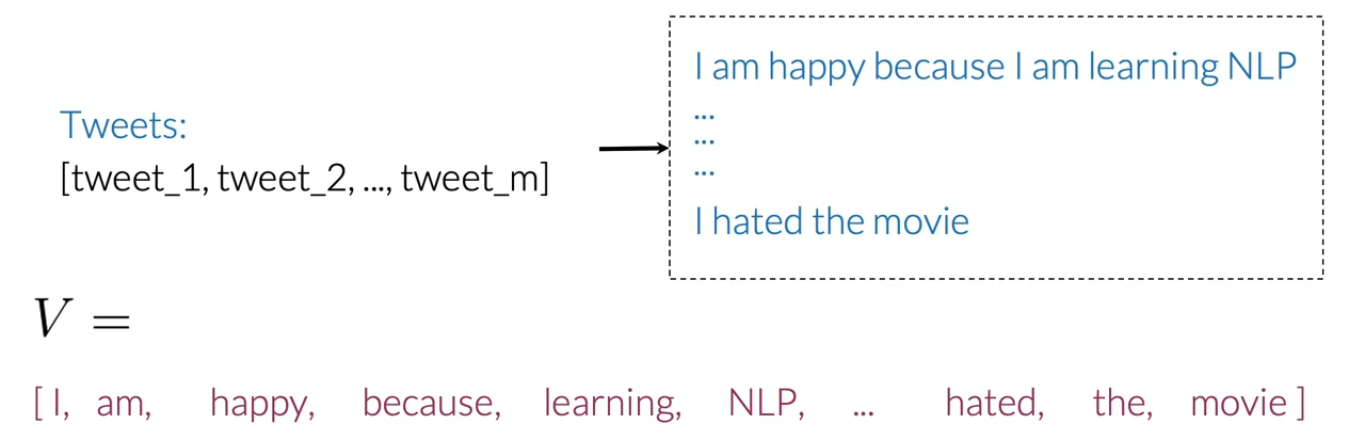

Vamos pegar esses tweets e extrair características usando seu vocabulário. Para fazer isso, você teria que verificar se cada palavra do seu vocabulário aparece no tweet. Se aparecer, como no caso da palavra "eu", você atribuiria um valor de 1 a essa característica, assim. Se não aparecer, você atribuiria um valor de 0, dessa forma. Neste exemplo, a representação do seu tweet teria seis uns e muitos zeros. Esses zeros correspondem a cada palavra única do seu vocabulário que não está no tweet. Esse tipo de representação com um pequeno número relativo de valores diferentes de zero é chamado de representação esparsa.

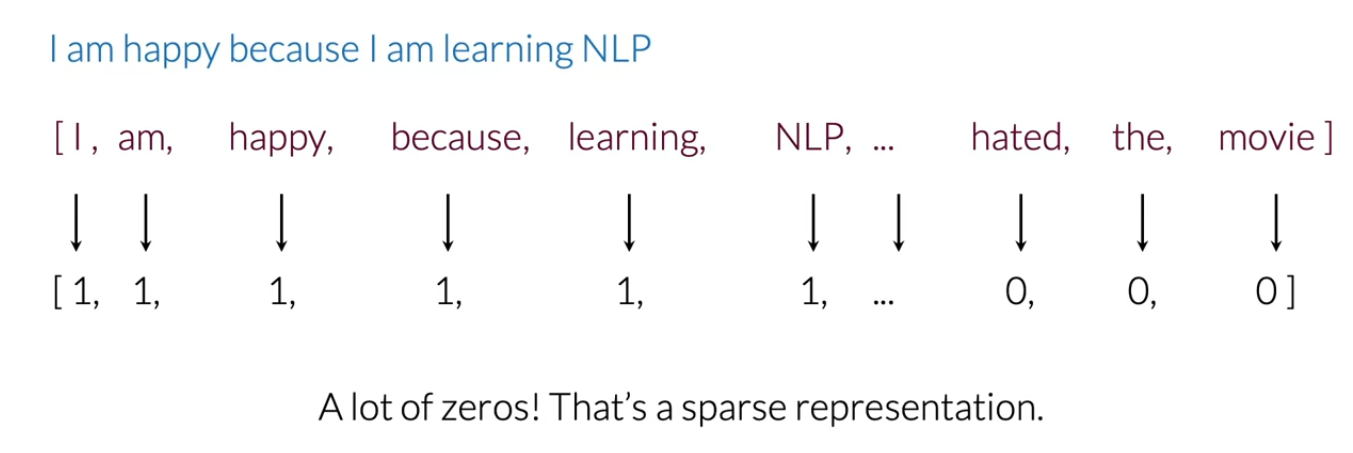

Agora vamos dar uma olhada mais de perto nessa representação do tweet. Mostramos como extrair características para representar o tweet com base em um vocabulário criando um vetor V. Esta representação teria um número de características igual ao tamanho do seu vocabulário inteiro. Isso resultaria em muitas características iguais a 0 para cada tweet. Com a representação esparsa, um modelo de regressão logística teria que aprender n mais 1 parâmetros, onde n seria igual ao tamanho do seu vocabulário. E você pode imaginar que, para tamanhos de vocabulário grandes, isso seria problemático. Levaria um tempo excessivo para treinar seu modelo e muito mais tempo do que o necessário para fazer previsões.

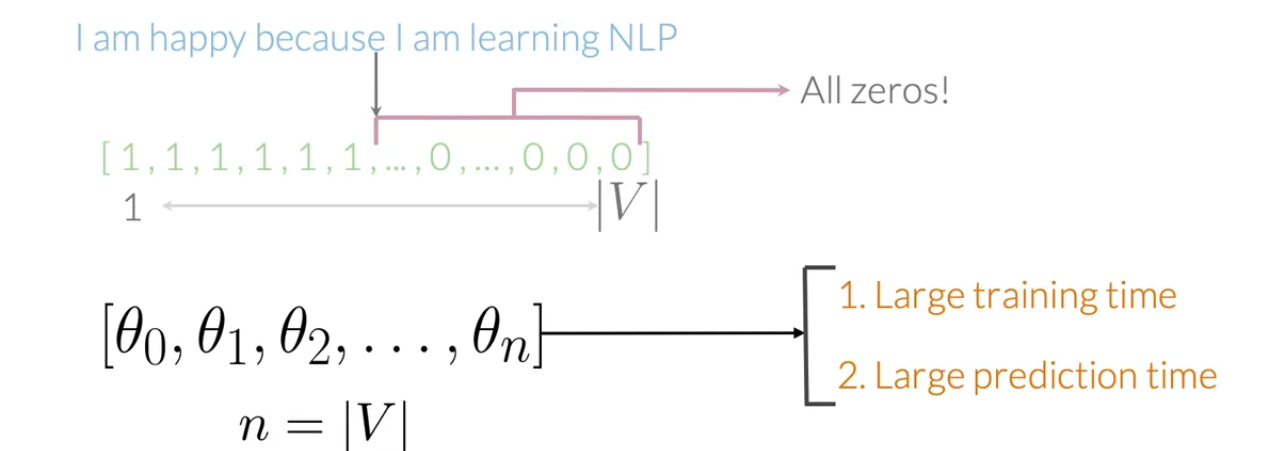

Dado um texto, você aprendeu como representar este texto como um vetor de dimensão V. Especificamente, você fez isso para um tweet e foi capaz de construir um vocabulário de dimensão V. Agora, à medida que V fica maior e maior, você enfrentará certos problemas.

# Negative and Positive Frequencies

Agora vamos aprender a gerar contagens, que você pode usar como características no seu classificador de regressão logística. Especificamente, dado uma palavra, você quer rastrear o número de vezes que ela aparece na classe positiva. Da mesma forma, para outra palavra, você quer rastrear o número de vezes que essa palavra aparece na classe negativa. Usando ambas as contagens, você pode então extrair características e usar essas características no seu classificador de regressão logística. Então, vamos ver como você pode fazer isso.

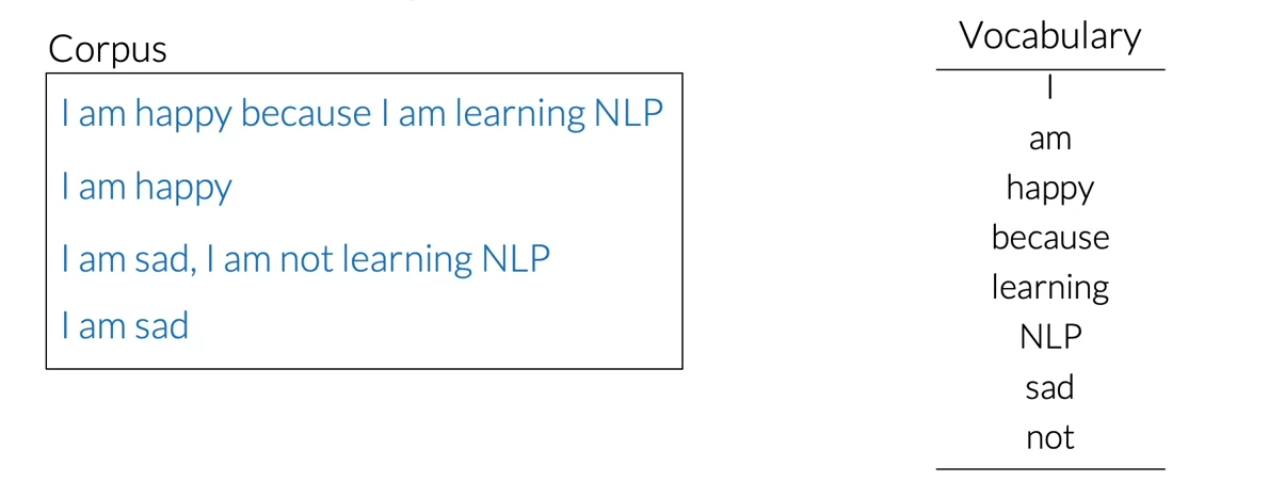

É útil primeiro imaginar como essas duas classes seriam. Aqui, por exemplo, você poderia ter um corpus consistindo de quatro tweets. Associado a esse corpus, você teria um conjunto de palavras únicas, seu vocabulário. Neste exemplo, seu vocabulário teria oito palavras únicas. Para este exemplo específico de análise de sentimentos, você tem duas classes: uma classe associada ao sentimento positivo e outra ao sentimento negativo. Pegando seu corpus, você teria um conjunto de dois tweets que pertencem à classe positiva e um conjunto de dois tweets que pertencem à classe negativa.

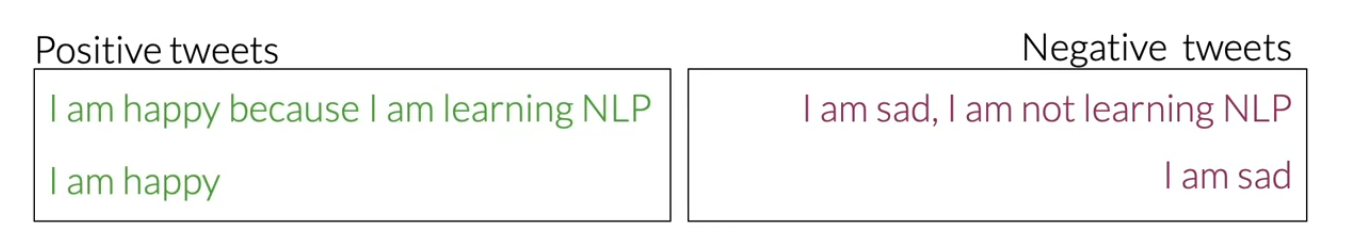

Vamos pegar o conjunto de tweets positivos. Agora, olhe para seu vocabulário. Para obter a frequência positiva de qualquer palavra no seu vocabulário, você terá que contar as vezes que ela aparece nos tweets positivos. Por exemplo, a palavra "feliz" aparece uma vez no primeiro tweet positivo e outra vez no segundo tweet positivo. Então, sua frequência positiva é dois.

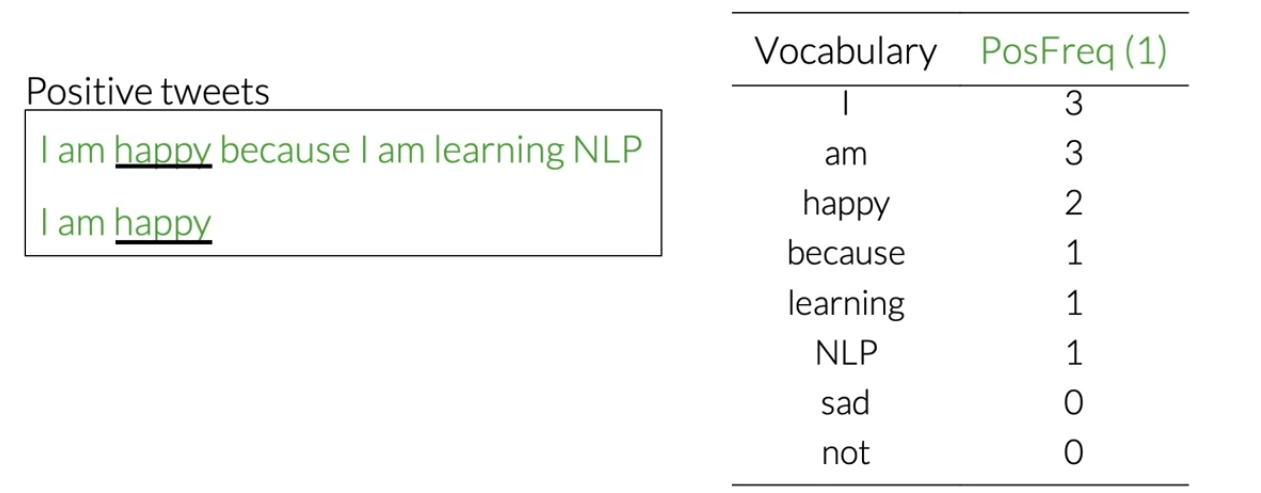

A mesma lógica se aplica para obter a frequência negativa. No entanto, para maior clareza, veja um exemplo: a palavra "estou" aparece duas vezes no primeiro tweet e mais uma vez no segundo tweet negativo. Portanto, sua frequência negativa é três. Veja a tabela completa das frequências negativas e sinta-se à vontade para verificar seus valores.

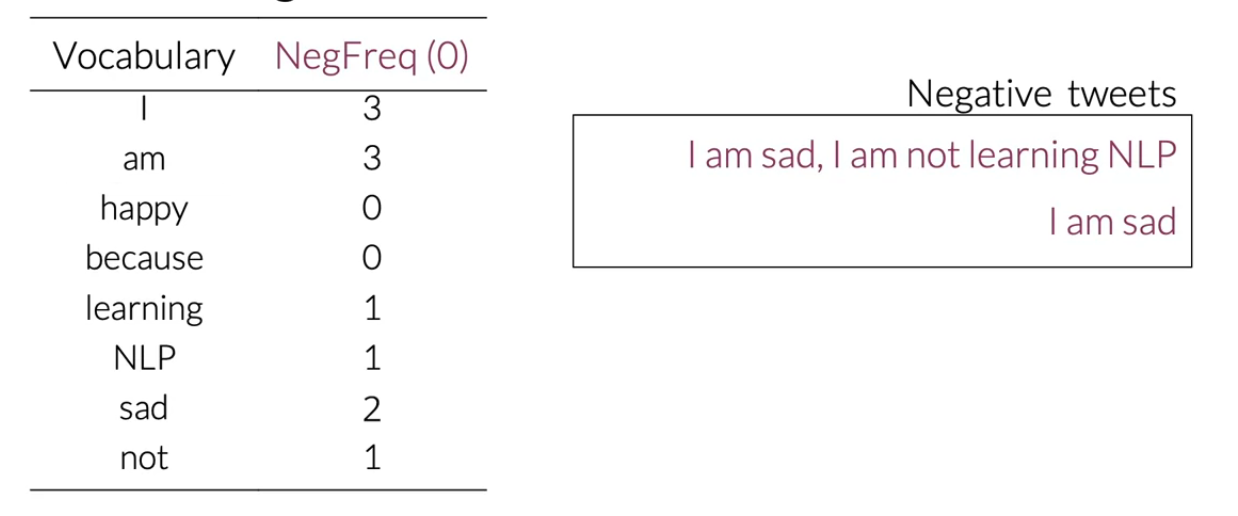

Então, esta é a tabela completa com as frequências positivas e negativas do seu corpus. Na prática, ao codificar, essa tabela é um dicionário que mapeia de uma palavra e classe para sua frequência. Então, ela mapeia a palavra e sua classe correspondente para a frequência ou o número de vezes que essa palavra apareceu na classe.

Agora você sabe como criar um dicionário de frequências, que mapeia uma palavra e a classe para o número de vezes que essa palavra apareceu na classe correspondente.

# Feature Extraction with Frequencies

Anteriormente, você aprendeu a codificar um tweet como um vetor de dimensão V. Agora, você aprenderá a codificar um tweet como um vetor de dimensão 3. Fazendo isso, você terá uma velocidade muito maior para seu classificador de regressão logística, pois em vez de aprender V características, você só precisa aprender três características. Vamos ver como você pode fazer isso.

Você acabou de ver que a frequência de uma palavra em uma classe é simplesmente o número de vezes que a palavra aparece no conjunto de tweets pertencentes àquela classe e que esta tabela é basicamente um dicionário que mapeia pares de palavras e classes para frequências, ou seja, nos diz quantas vezes cada palavra apareceu na sua classe correspondente. Agora que você construiu seu dicionário de frequências, você pode usá-lo para extrair características úteis para a análise de sentimentos.

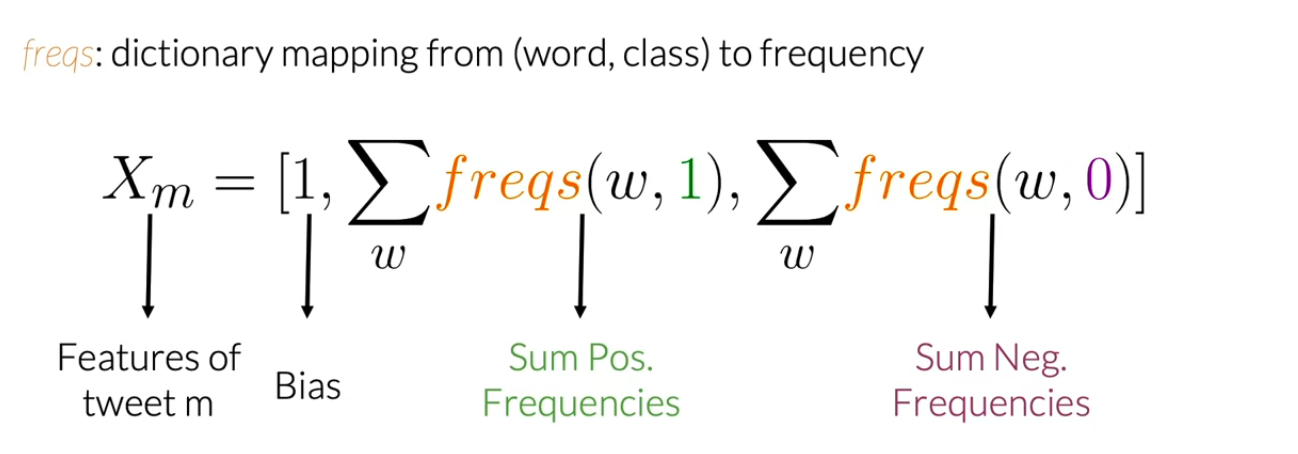

Como é uma característica? Vamos olhar para um tweet arbitrário $ m $. A primeira característica seria uma unidade de viés igual a 1. A segunda é a soma das frequências positivas para cada palavra única no tweet $ m $. A terceira é a soma das frequências negativas para cada palavra única no tweet. Então, para extrair as características para esta representação, você só precisa somar as frequências das palavras. Simples.

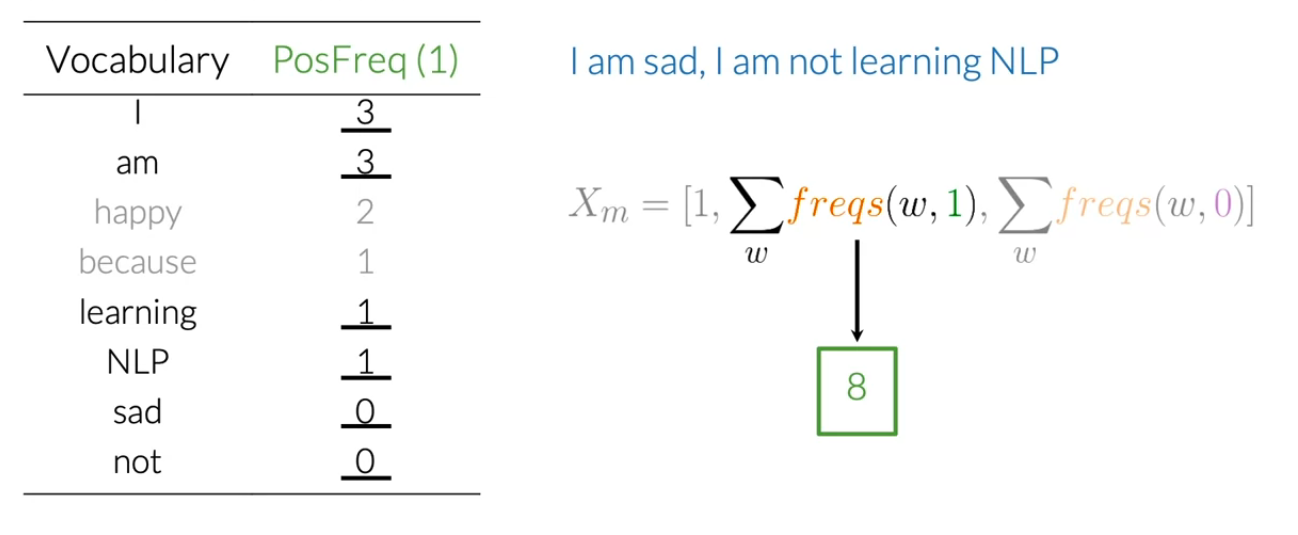

Por exemplo, pegue os seguintes tweets. Agora, vamos olhar para as frequências da classe positiva do último exemplo. As únicas palavras do vocabulário que não aparecem nesses tweets são "feliz" e "porque". Agora, vamos dar uma olhada na segunda característica da representação. Para obter esse valor, você precisa somar as frequências das palavras do vocabulário que aparecem no tweet. No final, você obtém um valor igual a oito.

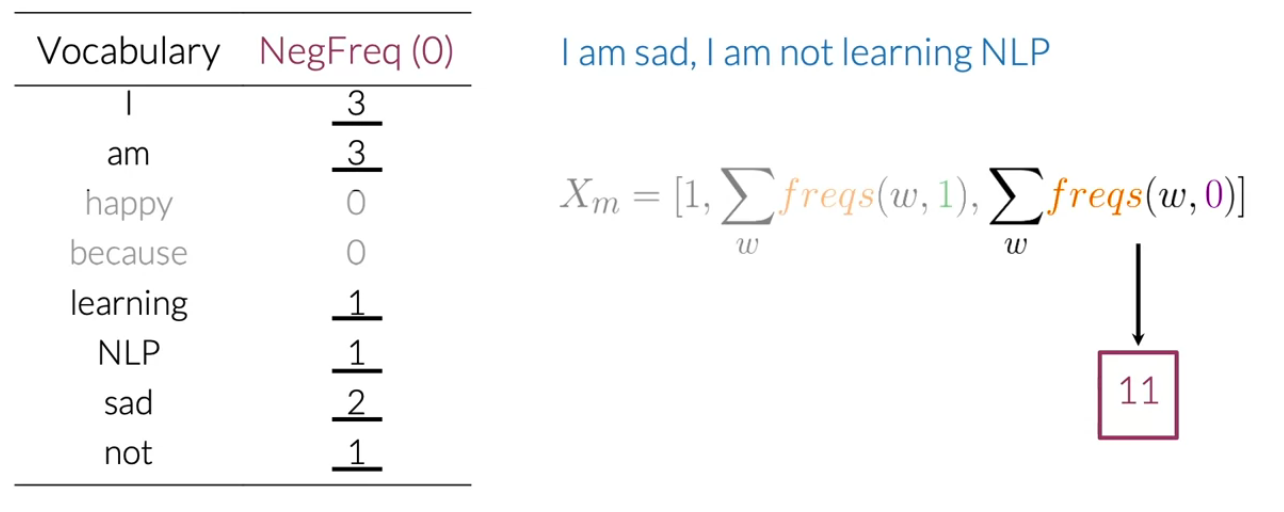

Agora, vamos obter o valor da terceira característica. É a soma das frequências negativas das palavras do vocabulário que aparecem no tweet. Para este exemplo, você deve obter 11 após somar as frequências sublinhadas. Portanto, para este tweet, essa representação seria igual ao vetor [1, 8, 11].

Agora você sabe como representar um tweet como um vetor de dimensão 3. Onde o primeiro componente é sempre 1 (o termo de viés), o segundo componente é a soma das frequências das palavras na classe positiva, e o terceiro componente é a soma das frequências das palavras na classe negativa.

# Preprocessing

Agora você aprenderá sobre dois conceitos importantes de pré-processamento. O primeiro conceito é chamado de "stemming" e o segundo é "stop words" (palavras irrelevantes). Especificamente, você aprenderá como usar stemming e stop words para pré-processar seus textos. Vamos ver como fazer isso.

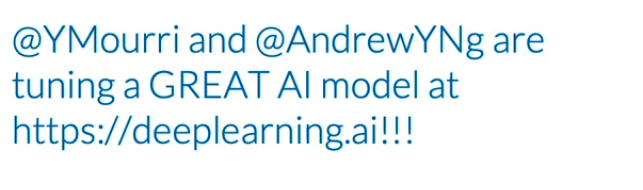

Vamos processar este tweet. Primeiro, removo todas as palavras que não adicionam significado significativo aos tweets, ou seja, stop words e sinais de pontuação. Na prática, você precisaria comparar seu tweet com duas listas: uma com stop words em inglês e outra com pontuação. Essas listas geralmente são muito maiores, mas para o propósito deste exemplo, elas servirão. Toda palavra do tweet que também aparecer na lista de stop words deve ser eliminada. Portanto, você precisaria eliminar a palavra "and", a palavra "are", a palavra "a" e a palavra "at". O tweet sem stop words fica assim:

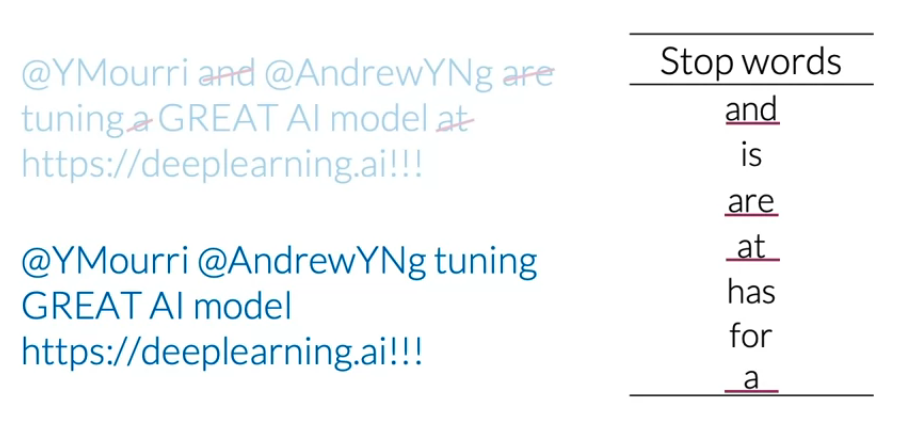

Note que o significado geral da frase pode ser inferido sem nenhum esforço. Agora, vamos eliminar todos os sinais de pontuação. Neste exemplo, há apenas pontos de exclamação. O tweet sem stop words e pontuação fica assim:

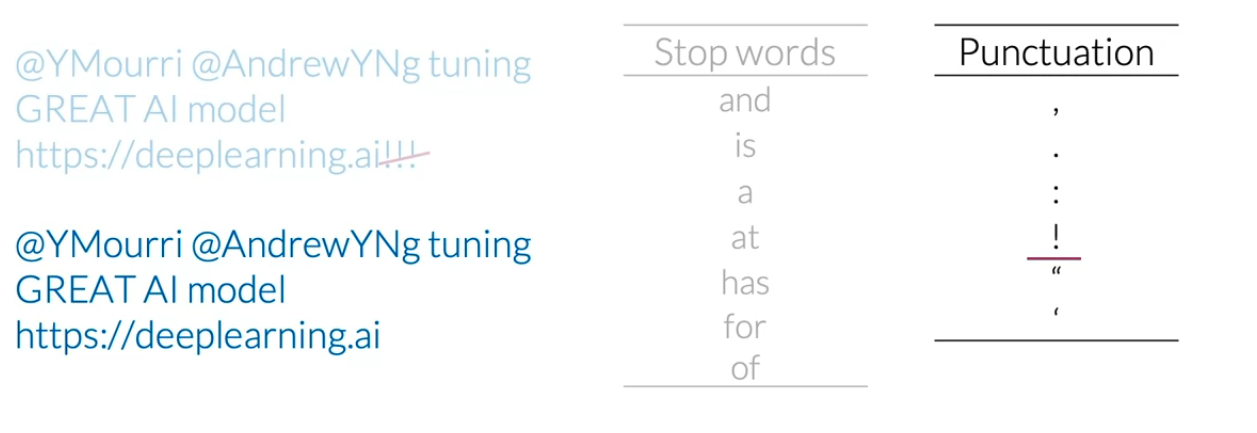

No entanto, observe que em alguns contextos você não precisará eliminar a pontuação. Portanto, você deve pensar cuidadosamente se a pontuação adiciona informações importantes à sua tarefa específica de PLN (Processamento de Linguagem Natural) ou não. Tweets e outros tipos de textos frequentemente têm handles (nomes de usuário) e URLs, mas esses não adicionam valor para a tarefa de análise de sentimentos. Vamos eliminar esses dois handles e esta URL.

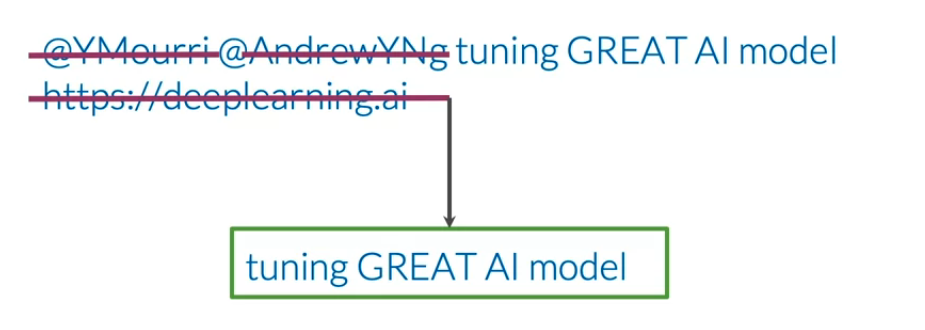

No final deste processo, o tweet resultante contém todas as informações importantes relacionadas ao seu sentimento. "Tuning GREAT AI model" é claramente um tweet positivo e um modelo suficientemente bom deve ser capaz de classificá-lo.

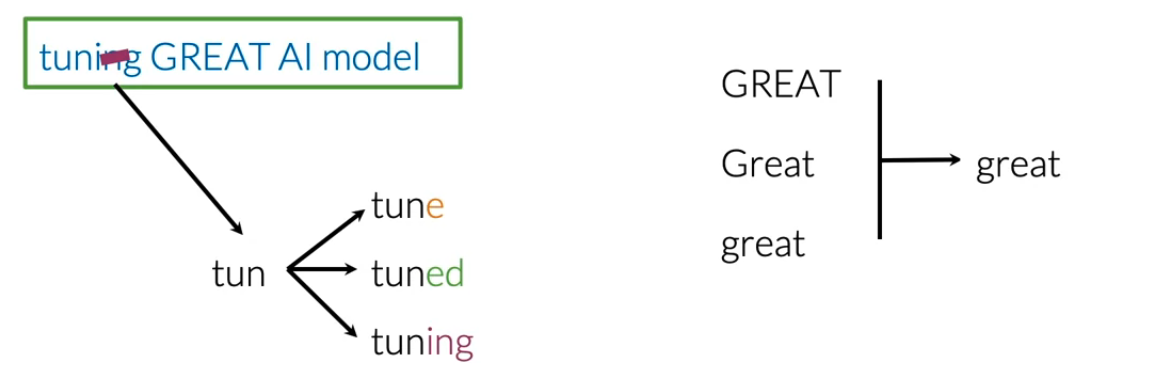

Agora que o tweet do exemplo tem apenas as informações necessárias, vou realizar o stemming para cada palavra. Stemming em PLN é simplesmente transformar qualquer palavra em sua raiz, que você pode definir como o conjunto de caracteres usados para construir a palavra e seus derivados. Vamos pegar a primeira palavra do exemplo. Sua raiz é "tun", porque adicionando a letra "e", forma a palavra "tune". Adicionando o sufixo "ed", forma a palavra "tuned", e adicionando o sufixo "ing", forma a palavra "tuning". Depois de realizar o stemming em seu corpus, as palavras "tune", "tuned" e "tuning" serão reduzidas à raiz "tun". Portanto, seu vocabulário seria significativamente reduzido ao realizar esse processo para cada palavra no corpus.

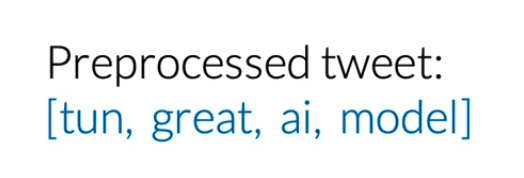

Para reduzir ainda mais seu vocabulário sem perder informações valiosas, você precisaria transformar todas as suas palavras em letras minúsculas. Então, a palavra "GREAT", "Great" e "great" seriam tratadas como a mesma palavra exata. Este é o tweet final pré-processado como uma lista de palavras:

["tun", "great", "ai", "model"]

Agora que você está familiarizado com stemming e stop words, você conhece o básico do processamento de textos.

# LAB-Natural Language preprocessing

## Setup

Vamos realizar a análise de sentimentos em tweets. Para ajudar com isso, usaremos o [Natural Language Toolkit (NLTK)](http://www.nltk.org/howto/twitter.html), um pacote de Python de código aberto para processamento de linguagem natural. Ele possui módulos para coletar, manipular e processar dados do Twitter, e você se familiarizará com eles à medida que avançarmos no curso.

Para este exercício, usaremos um conjunto de dados do Twitter que vem com o NLTK. Este conjunto de dados foi anotado manualmente e serve para estabelecer linhas de base para modelos rapidamente. Vamos importá-los agora, assim como algumas outras bibliotecas que usaremos.

In [4]:
import nltk                                # Biblioteca Python para PLN
from nltk.corpus import twitter_samples    # Conjunto de dados do Twitter do NLTK
import matplotlib.pyplot as plt            # Biblioteca para visualização
import random                              # Gerador de números pseudo-aleatórios


## Sobre o conjunto de dados do Twitter

O conjunto de dados de exemplo do NLTK é separado em tweets positivos e negativos. Ele contém exatamente 5000 tweets positivos e 5000 tweets negativos. A correspondência exata entre essas classes não é coincidência. A intenção é ter um conjunto de dados balanceado. Isso não reflete as distribuições reais de classes positivas e negativas em streams ao vivo do Twitter. É apenas porque conjuntos de dados balanceados simplificam o design da maioria dos métodos computacionais necessários para a análise de sentimentos. No entanto, é melhor estar ciente de que esse balanceamento de classes é artificial.

Você pode baixar o conjunto de dados em seu espaço de trabalho (ou em seu computador local) fazendo:

In [5]:
# Baixa o conjunto de dados de exemplo do Twitter.
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\arthu\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

Podemos carregar os campos de texto dos tweets positivos e negativos usando o método `strings()` do módulo assim:

In [6]:
# Seleciona o conjunto de tweets positivos e negativos
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

Com esses comandos, você estará pronto para começar a trabalhar com os dados do Twitter e realizar análises de sentimentos usando o NLTK.

A seguir, vamos imprimir um relatório com o número de tweets positivos e negativos. Também é essencial conhecer a estrutura de dados dos conjuntos de dados.

In [7]:
print('Número de tweets positivos: ', len(all_positive_tweets))
print('Número de tweets negativos: ', len(all_negative_tweets))

print('\nO tipo de all_positive_tweets é: ', type(all_positive_tweets))
print('O tipo de uma entrada de tweet é: ', type(all_negative_tweets[0]))

Número de tweets positivos:  5000
Número de tweets negativos:  5000

O tipo de all_positive_tweets é:  <class 'list'>
O tipo de uma entrada de tweet é:  <class 'str'>


Podemos ver que os dados são armazenados em uma lista e, como você pode esperar, tweets individuais são armazenados como strings.

Você pode criar um relatório visual mais atraente usando a biblioteca [pyplot](https://matplotlib.org/tutorials/introductory/pyplot.html) do Matplotlib. Vamos ver como criar um [gráfico de pizza](https://matplotlib.org/3.2.1/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py) para mostrar as mesmas informações acima. Este trecho simples será útil para visualizações futuras deste tipo de dados.

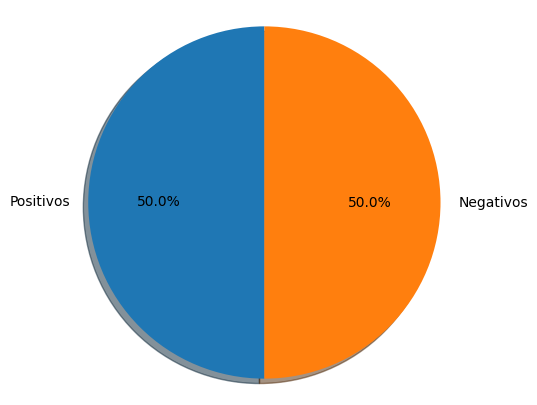

In [8]:
# Declarar uma figura com um tamanho personalizado
fig = plt.figure(figsize=(5, 5))

# Rótulos para as duas classes
labels = 'Positivos', 'Negativos'

# Tamanhos para cada fatia
sizes = [len(all_positive_tweets), len(all_negative_tweets)] 

# Declarar o gráfico de pizza, onde as fatias serão ordenadas e plotadas no sentido anti-horário:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# A proporção de aspecto igual garante que o gráfico de pizza seja desenhado como um círculo.
plt.axis('equal')  

# Exibir o gráfico
plt.show()

## Analisando textos brutos

Antes de mais nada, podemos imprimir alguns tweets do conjunto de dados para ver como eles são. Compreender os dados é responsável por 80% do sucesso ou fracasso em projetos de ciência de dados. Podemos usar este momento para observar aspectos que gostaríamos de considerar ao pré-processar nossos dados.

Abaixo, vamos imprimir um tweet positivo aleatório e um tweet negativo aleatório. Adicionamos um marcador de cor no início da string para distinguir melhor os dois. (Aviso: Isso é retirado de um conjunto de dados público de tweets reais e uma pequena parte pode conter conteúdo explícito.)

In [9]:
# Imprimir tweet positivo em verde
print('\033[92m' + all_positive_tweets[random.randint(0, 5000)])

# Imprimir tweet negativo em vermelho
print('\033[91m' + all_negative_tweets[random.randint(0, 5000)])

@CurvaNordSoul If he scores more than 10 goals, that list will be forgotten. :)
This was in Sheffield :( I miss him so mych http://t.co/kgpUCPTdAx


Uma observação que você pode ter é a presença de [emoticons](https://en.wikipedia.org/wiki/Emoticon) e URLs em muitos dos tweets. Essas informações serão úteis nos próximos passos.

## Pré-processamento de texto bruto para análise de sentimento

O pré-processamento de dados é uma etapa crítica em qualquer projeto de aprendizado de máquina. Isso inclui limpar e formatar os dados antes de alimentá-los em um algoritmo de aprendizado de máquina. Para processamento de linguagem natural (NLP), as etapas de pré-processamento são compostas pelas seguintes tarefas:

- Tokenização da string
- Conversão para minúsculas
- Remoção de stopwords e pontuações
- Stemming

Vamos ver como podemos aplicar essas etapas a um tweet específico. Vamos escolher um tweet e ver como ele é transformado por cada etapa de pré-processamento.

In [10]:
# Nosso exemplo selecionado. Complexo o suficiente para exemplificar cada etapa
tweet = all_positive_tweets[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i



Vamos importar mais algumas bibliotecas para este propósito.

In [11]:
# Baixar as stop words do NLTK
nltk.download('stopwords')

import re                                  # Biblioteca para operações de expressões regulares
import string                              # Para operações com strings

from nltk.corpus import stopwords          # Módulo para stopwords que vem com NLTK
from nltk.stem import PorterStemmer        # Módulo para stemming
from nltk.tokenize import TweetTokenizer   # Módulo para tokenização de strings

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arthu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Removendo hiperlinks, marcas e estilos do Twitter

Como estamos lidando com um conjunto de dados do Twitter, gostaríamos de remover algumas substrings comumente usadas na plataforma, como hashtags, marcas de retweet e hiperlinks. Usaremos a biblioteca `re` para realizar operações de expressão regular em nosso tweet. Vamos definir nosso padrão de busca e usar o método `sub()` para remover correspondências substituindo por um caractere vazio (ou seja, `''`).

In [12]:
print('\033[92m' + tweet)
print('\033[94m')

# remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+', '', tweet)

# remove hyperlinks
tweet2 = re.sub(r'https?://[^\s\n\r]+', '', tweet2)

# remove hashtags
# apenas removendo o sinal de hash # das palavras
tweet2 = re.sub(r'#', '', tweet2)

print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


### Tokenize the string

Tokenizar significa dividir as strings em palavras individuais sem espaços ou tabulações. Nessa mesma etapa, também converteremos cada palavra da string para minúsculas. O módulo [tokenize](https://www.nltk.org/api/nltk.tokenize.html#module-nltk.tokenize.casual) do NLTK nos permite fazer isso facilmente:

In [13]:
print()
print('\033[92m' + tweet2)
print('\033[94m')

# instanciar a classe do tokenizer
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

# tokenizar os tweets
tweet_tokens = tokenizer.tokenize(tweet2)

print()
print('String tokenizada:')
print(tweet_tokens)


My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


String tokenizada:
['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


### Remover stop words e pontuações

O próximo passo é remover stop words e pontuações. Stop words são palavras que não adicionam significado importante ao texto. Você verá a lista fornecida pelo NLTK ao executar as células abaixo.

In [14]:
# Importar a lista de stop words em inglês do NLTK
stopwords_english = stopwords.words('english') 

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

Podemos ver que a lista de stop words acima contém algumas palavras que podem ser importantes em alguns contextos. 
Estas palavras podem incluir _i, not, between, because, won, against_. Você pode precisar personalizar a lista de stop words para algumas aplicações. Para nosso exercício, vamos usar a lista inteira.

Quanto à pontuação, vimos anteriormente que certos agrupamentos como ':)' e '...' devem ser mantidos ao lidar com tweets, pois são usados para expressar emoções. Em outros contextos, como análise médica, esses agrupamentos também devem ser removidos.

Hora de limpar nosso tweet tokenizado!

In [15]:
print()
print('\033[92m')
print(tweet_tokens)
print('\033[94m')

tweets_clean = []

for word in tweet_tokens: # Percorrer cada palavra na lista de tokens
    if (word not in stopwords_english and  # remover stop words
        word not in string.punctuation):  # remover pontuação
        tweets_clean.append(word)

print('Removidas stop words e pontuações:')
print(tweets_clean)



['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']

Removidas stop words e pontuações:
['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


### Stemming

O stemming é o processo de converter uma palavra para sua forma mais geral, ou raiz. Isso ajuda a reduzir o tamanho do nosso vocabulário.

Considere as palavras:
 * **learn**
 * **learn**ing
 * **learn**ed
 * **learn**t
 
Todas essas palavras são derivadas de sua raiz comum **learn**. No entanto, em alguns casos, o processo de stemming produz palavras que não são grafias corretas da palavra raiz. Por exemplo, **happi** e **sunni**. Isso ocorre porque o algoritmo escolhe o stem mais comum para palavras relacionadas. Por exemplo, podemos observar o conjunto de palavras que compõem as diferentes formas de happy:

 * **happ**y
 * **happi**ness
 * **happi**er
 
Podemos ver que o prefixo **happi** é mais comumente usado. Não podemos escolher **happ** porque é o stem de palavras não relacionadas como **happen**.
 
O NLTK possui diferentes módulos para stemming e estaremos utilizando o módulo [PorterStemmer](https://www.nltk.org/api/nltk.stem.html#module-nltk.stem.porter), que utiliza o [Algoritmo de Stemming de Porter](https://tartarus.org/martin/PorterStemmer/). Vejamos como usá-lo na célula abaixo.

In [16]:
print()
print('\033[92m')
print(tweets_clean)
print('\033[94m')

# Instanciar a classe de stemming
stemmer = PorterStemmer() 

# Criar uma lista vazia para armazenar os stems
tweets_stem = [] 

for word in tweets_clean:
    stem_word = stemmer.stem(word)  # aplicar stemming à palavra
    tweets_stem.append(stem_word)  # adicionar à lista

print('Palavras após stemming:')
print(tweets_stem)



['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']

Palavras após stemming:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']



É isso! Agora temos um conjunto de palavras que podemos utilizar na próxima etapa do nosso projeto de aprendizado de máquina.

# Putting it All Together

Para criar uma matriz que corresponda a todas as características do seu exemplo de treinamento, você usará tudo o que aprendeu até agora. Vou guiá-lo através de um algoritmo que permite gerar essa matriz $ X $. Vamos ver como você pode construí-la.

Anteriormente, você viu como pré-processar um tweet como este para obter uma lista de palavras que contêm todas as informações relevantes para as tarefas de análise de sentimento em PLN (Processamento de Linguagem Natural). Com essa lista de palavras, você poderia obter uma boa representação usando um dicionário de frequência. Finalmente, você obteria um vetor com uma unidade de bias e duas características adicionais que armazenam a soma do número de vezes que cada palavra nos seus tweets processados aparece em tweets positivos e a soma do número de vezes que aparecem em tweets negativos.

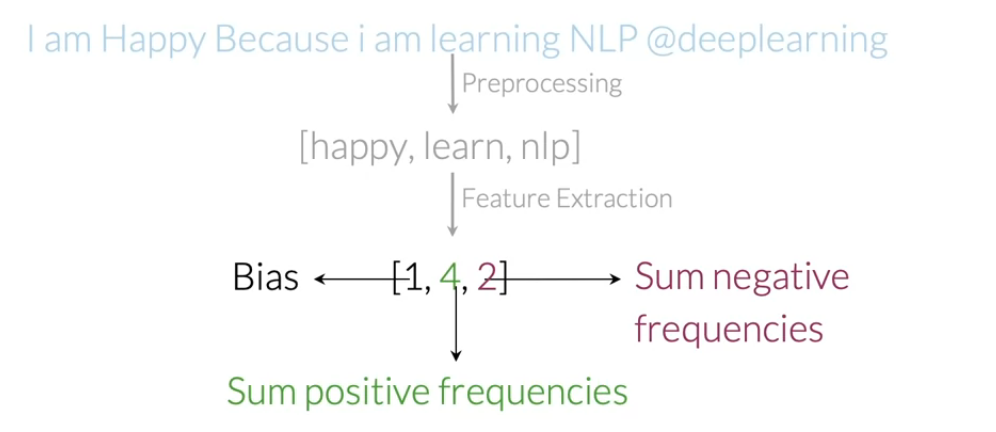

Na prática, você teria que realizar este processo em um conjunto de $ m $ tweets. Então, dado um conjunto de múltiplos tweets brutos, você teria que pré-processá-los um por um para obter esses conjuntos de listas de palavras, uma para cada tweet. Finalmente, você seria capaz de extrair características usando um mapeamento de dicionário de frequências. No final, você teria uma matriz $ X $ com $ m $ linhas e três colunas, onde cada linha conteria as características de cada um dos seus tweets.

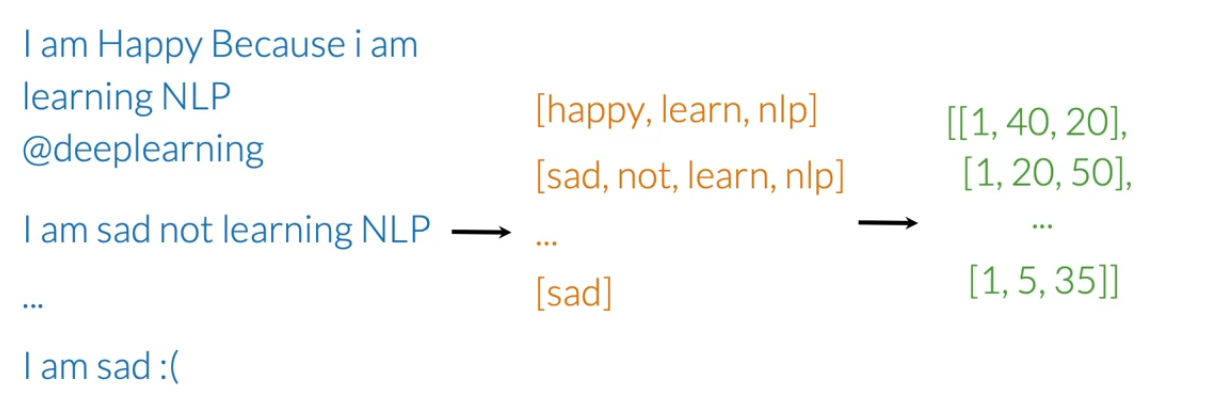

A implementação geral deste processo é bastante simples. Primeiro, você constrói o dicionário de frequências. Em seguida, inicializa a matriz $ X $ para corresponder ao seu número de tweets. Depois disso, você vai percorrer seus conjuntos de tweets, cuidadosamente deletando stop words, aplicando stemming, deletando URLs e handles e convertendo tudo para minúsculas. E finalmente, extrair as características somando as frequências positivas e negativas dos tweets.

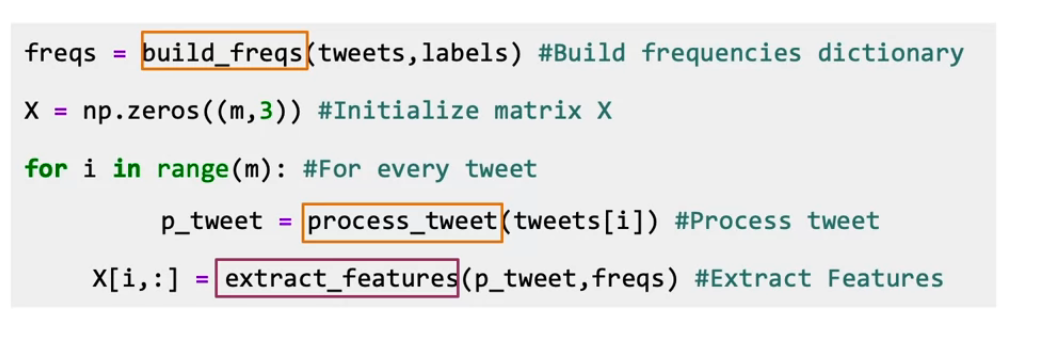

Para esta tarefa, você recebeu algumas funções auxiliares, como `build_freqs` e `process_tweet`. No entanto, você terá que implementar a função para extrair as características de um único tweet. Foi muito código, mas pelo menos agora você tem sua matriz $ X $.

# LAB-Visualizing word frequencies

## Construindo e Visualizando Frequências de Palavras

Neste laboratório, focaremos na função auxiliar `build_freqs()` e na visualização de um conjunto de dados alimentado por ela. No nosso objetivo de análise de sentimento de tweets, essa função construirá um dicionário onde podemos consultar quantas vezes uma palavra aparece nas listas de tweets positivos ou negativos. Isso será muito útil ao extrair as características do conjunto de dados.

## Configuração

Vamos importar as bibliotecas necessárias para este laboratório:

In [17]:
import nltk                                  # Biblioteca Python para PLN
from nltk.corpus import twitter_samples      # Conjunto de dados de amostra do Twitter do NLTK
import matplotlib.pyplot as plt              # Biblioteca de visualização
import numpy as np                           # Biblioteca para computação científica e operações matriciais

nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\arthu\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

### Algumas funções auxiliares:
* - `process_tweet()`: Limpa o texto, tokeniza em palavras separadas, remove stopwords e converte as palavras para suas raízes.
* - `build_freqs()`: Conta com que frequência uma palavra no 'corpus' (o conjunto completo de tweets) foi associada a um rótulo positivo `1` ou um rótulo negativo `0`. Em seguida, constrói o dicionário `freqs`, onde cada chave é uma tupla `(palavra, rótulo)`, e o valor é a contagem de sua frequência dentro do corpus de tweets.


In [18]:
def process_tweet(tweet):
    """Função de processamento de tweet.
    Entrada:
        tweet: uma string contendo um tweet
    Saída:
        tweets_clean: uma lista de palavras contendo o tweet processado
    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    
    # Remove tickers do mercado de ações, como $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    
    # Remove texto de retweet no estilo antigo "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    
    # Remove hyperlinks    
    tweet = re.sub(r'https?://[^\s\n\r]+', '', tweet)
    
    # Remove hashtags, apenas o símbolo # da palavra
    tweet = re.sub(r'#', '', tweet)
    
    # Tokeniza o tweet
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # Remove stopwords
                word not in string.punctuation):  # Remove pontuação
            stem_word = stemmer.stem(word)  # Aplica stemming na palavra
            tweets_clean.append(stem_word)

    return tweets_clean

def build_freqs(tweets, ys):
    """Constrói frequências.
    Entrada:
        tweets: uma lista de tweets
        ys: um array m x 1 com o rótulo de sentimento de cada tweet (0 ou 1)
    Saída:
        freqs: um dicionário mapeando cada par (palavra, sentimento) para sua frequência
    """
    # Converte np array para lista, já que zip precisa de um iterável.
    # O squeeze é necessário ou a lista acaba com um elemento.
    # Também note que isso é apenas um NOP se ys já for uma lista.
    yslist = np.squeeze(ys).tolist()

    # Começa com um dicionário vazio e preenche-o percorrendo todos os tweets
    # e todas as palavras processadas em cada tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

In [19]:
# Baixar as stopwords para a função process_tweet
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arthu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Com essas importações, você está pronto para começar a construir o dicionário de frequências e visualizar os dados.

## Carregar o Conjunto de Dados de Exemplo do NLTK

Como no laboratório anterior, usaremos o [conjunto de dados do Twitter do NLTK](http://www.nltk.org/howto/twitter.html#Using-a-Tweet-Corpus).

In [20]:
# selecionar as listas de tweets positivos e negativos
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

# concatenar as listas, a primeira parte são os tweets positivos seguidos pelos negativos
tweets = all_positive_tweets + all_negative_tweets

# ver quantos tweets temos
print("Número de tweets: ", len(tweets))

Número de tweets:  10000


Em seguida, vamos construir um array de rótulos que corresponda aos sentimentos dos nossos tweets. Esse tipo de dado funciona de maneira semelhante a uma lista regular, mas é otimizado para cálculos e manipulação. O array `labels` será composto por 10.000 elementos. Os primeiros 5.000 serão preenchidos com rótulos `1` denotando sentimentos positivos, e os próximos 5.000 serão rótulos `0` denotando o oposto. Podemos fazer isso facilmente com uma série de operações fornecidas pela biblioteca `numpy`:

* `np.ones()` - cria um array de 1's
* `np.zeros()` - cria um array de 0's
* `np.append()` - concatena arrays

In [21]:
# criar um array numpy representando os rótulos dos tweets
labels = np.append(np.ones((len(all_positive_tweets))), np.zeros((len(all_negative_tweets))))

## Dicionários

Em Python, um dicionário é uma coleção mutável e indexada. Ele armazena itens como pares chave-valor e usa [tabelas de hash](https://en.wikipedia.org/wiki/Hash_table) por baixo para permitir buscas em tempo praticamente constante. Em PLN, dicionários são essenciais porque permitem a recuperação rápida de itens ou verificações de contenção, mesmo com milhares de entradas na coleção.

### Definição

Um dicionário em Python é declarado usando chaves. Veja o exemplo a seguir:

In [22]:
dictionary = {'key1': 1, 'key2': 2}

A linha acima define um dicionário com duas entradas. Chaves e valores podem ser de quase qualquer tipo ([com algumas restrições nas chaves](https://docs.python.org/3/tutorial/datastructures.html#dictionaries)), e neste caso, usamos strings. Também podemos usar floats, inteiros, tuplas, etc.

### Adicionando ou Editando Entradas

Novas entradas podem ser inseridas em dicionários usando colchetes. Se o dicionário já contiver a chave especificada, seu valor será sobrescrito.


In [23]:
# Adicionar uma nova entrada
dictionary['key3'] = -5

# Sobrescrever o valor de key1
dictionary['key1'] = 0

print(dictionary)

{'key1': 0, 'key2': 2, 'key3': -5}


### Acessando Valores e Consultando Chaves

Realizar consultas e recuperações de dicionários são tarefas comuns em PLN. Existem duas maneiras de fazer isso:

* Usando notação de colchetes: Essa forma é permitida se a chave de consulta estiver no dicionário. Caso contrário, produz um erro.
* Usando o método [get()](https://docs.python.org/3/library/stdtypes.html#dict.get): Isso nos permite definir um valor padrão se a chave do dicionário não existir.

Vamos ver isso em ação:

In [24]:
# Consulta com colchetes quando a chave existe
print(dictionary['key2'])

# Consulta com colchetes quando a chave não existe (produz erro)
# print(dictionary['key4'])  # Descomente para ver o erro

# Usando o método get() para consulta segura
print(dictionary.get('key2'))  # Retorna o valor associado à chave 'key2'
print(dictionary.get('key4', 'Not Found'))  # Retorna 'Not Found' pois a chave 'key4' não existe

2
2
Not Found


Quando usamos uma consulta com colchetes, é comum usar um bloco if-else para verificar a existência da chave primeiro (com a palavra-chave `in`) antes de obter o item. Por outro lado, você pode usar o método `.get()` se quiser definir um valor padrão quando a chave não for encontrada. Vamos comparar esses métodos nas células abaixo:

```python
# Isso imprime um valor
if 'key1' in dictionary:
    print("item encontrado: ", dictionary['key1'])
else:
    print('key1 não está definida')

# Mesmo resultado que você obtém com get
print("item encontrado: ", dictionary.get('key1', -1))

# Isso imprime uma mensagem porque a chave não foi encontrada
if 'key7' in dictionary:
    print(dictionary['key7'])
else:
    print('a chave não existe!')

# Isso imprime -1 porque a chave não foi encontrada e definimos o padrão como -1
print(dictionary.get('key7', -1))
```

## Dicionário de Frequência de Palavras

Agora que conhecemos os blocos de construção, vamos finalmente dar uma olhada na função **build_freqs()** em **utils.py**. Esta é a função que cria o dicionário contendo as contagens de palavras de cada corpus.

```python
def build_freqs(tweets, ys):
    """Constrói frequências.
    Entrada:
        tweets: uma lista de tweets
        ys: um array m x 1 com o rótulo de sentimento de cada tweet (0 ou 1)
    Saída:
        freqs: um dicionário mapeando cada par (palavra, sentimento) para sua frequência
    """
    # Converte np array para lista, já que zip precisa de um iterável.
    # O squeeze é necessário ou a lista acaba com um elemento.
    # Também note que isso é apenas um NOP se ys já for uma lista.
    yslist = np.squeeze(ys).tolist()

    # Começa com um dicionário vazio e preenche-o percorrendo todos os tweets
    # e todas as palavras processadas em cada tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1    
    return freqs
```

Você também pode fazer o loop for assim para torná-lo um pouco mais compacto:

```python
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            freqs[pair] = freqs.get(pair, 0) + 1
```

Conforme mostrado acima, cada chave é uma tupla de 2 elementos contendo um par `(word, y)`. A `word` é um elemento em um tweet processado enquanto `y` é um inteiro representando o corpus: `1` para tweets positivos e `0` para tweets negativos. O valor associado a essa chave é o número de vezes que a palavra aparece no corpus especificado. Por exemplo:

```python
# "followfriday" aparece 25 vezes nos tweets positivos
('followfriday', 1.0): 25

# "shame" aparece 19 vezes nos tweets negativos
('shame', 0.0): 19
```

### Usando o dicionário de frequências

Primeiro, vamos alimentar nossas listas `tweets` e `labels` e imprimir um relatório básico:

In [25]:
# criar dicionário de frequências
freqs = build_freqs(tweets, labels)

# verificar o tipo de dado
print(f'type(freqs) = {type(freqs)}')

# verificar o tamanho do dicionário
print(f'len(freqs) = {len(freqs)}')

# imprimir a frequência de cada palavra dependendo da sua classe
print(freqs)

type(freqs) = <class 'dict'>
len(freqs) = 13173
{('followfriday', 1.0): 25, ('top', 1.0): 32, ('engag', 1.0): 7, ('member', 1.0): 16, ('commun', 1.0): 33, ('week', 1.0): 83, (':)', 1.0): 3691, ('hey', 1.0): 77, ('jame', 1.0): 7, ('odd', 1.0): 2, (':/', 1.0): 5, ('pleas', 1.0): 99, ('call', 1.0): 37, ('contact', 1.0): 7, ('centr', 1.0): 2, ('02392441234', 1.0): 1, ('abl', 1.0): 8, ('assist', 1.0): 1, ('mani', 1.0): 33, ('thank', 1.0): 643, ('listen', 1.0): 17, ('last', 1.0): 47, ('night', 1.0): 68, ('bleed', 1.0): 2, ('amaz', 1.0): 51, ('track', 1.0): 5, ('scotland', 1.0): 2, ('congrat', 1.0): 21, ('yeaaah', 1.0): 1, ('yipppi', 1.0): 1, ('accnt', 1.0): 2, ('verifi', 1.0): 2, ('rqst', 1.0): 1, ('succeed', 1.0): 1, ('got', 1.0): 69, ('blue', 1.0): 9, ('tick', 1.0): 1, ('mark', 1.0): 1, ('fb', 1.0): 6, ('profil', 1.0): 2, ('15', 1.0): 5, ('day', 1.0): 246, ('one', 1.0): 131, ('irresist', 1.0): 2, ('flipkartfashionfriday', 1.0): 17, ('like', 1.0): 233, ('keep', 1.0): 68, ('love', 1.0): 401,

Infelizmente, isso não ajuda muito a entender os dados. Seria melhor visualizar essa saída para obter melhores insights.

### Tabela de contagem de palavras

Vamos selecionar um conjunto de palavras que gostaríamos de visualizar. É melhor armazenar essa informação temporária em uma tabela que seja muito fácil de usar posteriormente.


In [26]:
# selecionar algumas palavras para aparecer no relatório. vamos assumir que cada palavra é única (ou seja, sem duplicatas)
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific']

# lista representando nossa tabela de contagem de palavras.
# cada elemento consiste de uma sublista com o seguinte padrão: [<palavra>, <contagem_positiva>, <contagem_negativa>]
data = []

# loop através das palavras selecionadas
for word in keys:
    
    # inicializar contagens positivas e negativas
    pos = 0
    neg = 0
    
    # recuperar número de contagens positivas
    if (word, 1) in freqs:
        pos = freqs[(word, 1)]
        
    # recuperar número de contagens negativas
    if (word, 0) in freqs:
        neg = freqs[(word, 0)]
        
    # adicionar a contagem de palavras à tabela
    data.append([word, pos, neg])
    
data

[['happi', 212, 25],
 ['merri', 1, 0],
 ['nice', 99, 19],
 ['good', 238, 101],
 ['bad', 18, 73],
 ['sad', 5, 123],
 ['mad', 4, 11],
 ['best', 65, 22],
 ['pretti', 20, 15],
 ['❤', 29, 21],
 [':)', 3691, 2],
 [':(', 1, 4584],
 ['😒', 2, 3],
 ['😬', 0, 2],
 ['😄', 5, 1],
 ['😍', 5, 1],
 ['♛', 0, 210],
 ['song', 22, 27],
 ['idea', 27, 10],
 ['power', 7, 6],
 ['play', 46, 48],
 ['magnific', 2, 0]]

### Visualizando a tabela com um gráfico de dispersão

Podemos usar um gráfico de dispersão para inspecionar essa tabela visualmente. Em vez de plotar as contagens brutas, vamos plotar na escala logarítmica para levar em conta as grandes discrepâncias entre as contagens brutas (por exemplo, `:)` tem 3691 contagens positivas e apenas 2 negativas). A linha vermelha marca o limite entre as áreas positivas e negativas. Palavras próximas à linha vermelha podem ser classificadas como neutras.

c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128556 (\N{GRIMACING FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


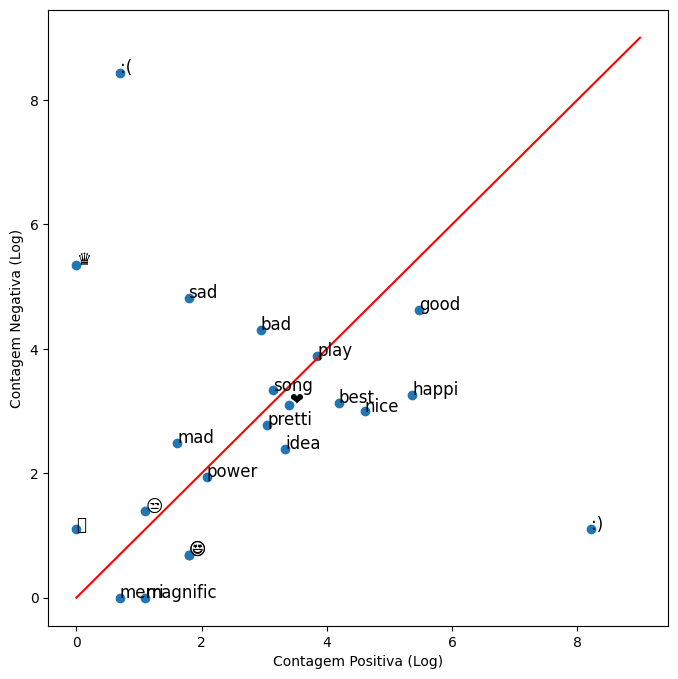

In [27]:
fig, ax = plt.subplots(figsize = (8, 8))

# converter contagens positivas brutas para escala logarítmica. adicionamos 1 para evitar log(0)
x = np.log([x[1] + 1 for x in data])  

# fazer o mesmo para as contagens negativas
y = np.log([x[2] + 1 for x in data]) 

# Plotar um ponto para cada par de palavras
ax.scatter(x, y)  

# atribuir rótulos aos eixos
plt.xlabel("Contagem Positiva (Log)")
plt.ylabel("Contagem Negativa (Log)")

# Adicionar a palavra como rótulo na mesma posição em que você adicionou os pontos anteriormente
for i in range(0, len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)

ax.plot([0, 9], [0, 9], color = 'red') # Plotar a linha vermelha que divide as 2 áreas.
plt.show()

Esse gráfico é fácil de interpretar. Ele mostra que emoticons como `:)` e `:(` são muito importantes para a análise de sentimentos. Portanto, não devemos deixar que as etapas de pré-processamento eliminem esses símbolos!

Além disso, qual é o significado do símbolo da coroa? Parece ser muito negativo!

# Logistic Regression Overview

### Visão Geral da Regressão Logística

Anteriormente, você aprendeu a extrair características dos tweets, e agora você usará essas características extraídas para prever se um tweet tem um sentimento positivo ou negativo. A regressão logística utiliza uma função sigmoide que gera uma probabilidade entre zero e um. Vamos dar uma olhada na visão geral da regressão logística.

#### Recapitulação Rápida

No aprendizado supervisionado, você tem características de entrada e um conjunto de rótulos. Para fazer previsões com base nos seus dados, você usa uma função com alguns parâmetros para mapear suas características para rótulos de saída. Para obter um mapeamento ótimo das suas características para os rótulos, você minimiza a função de custo, que funciona comparando o quão próximo a sua saída $ \hat{Y} $ está dos rótulos verdadeiros $ Y $ dos seus dados. Depois disso, os parâmetros são atualizados e você repete o processo até que o seu custo seja minimizado.

#### Regressão Logística

Para a regressão logística, esta função $ F $ é igual à função sigmoide. A função usada para classificar na regressão logística $ H $ é a função sigmoide e depende dos parâmetros $ \theta $ e do vetor de características $ \mathbf{X}^i $, onde $ i $ é usado para denotar a $ i $-ésima observação ou ponto de dados. No contexto dos tweets, isso significa o $ i $-ésimo tweet.

#### Função Sigmoide

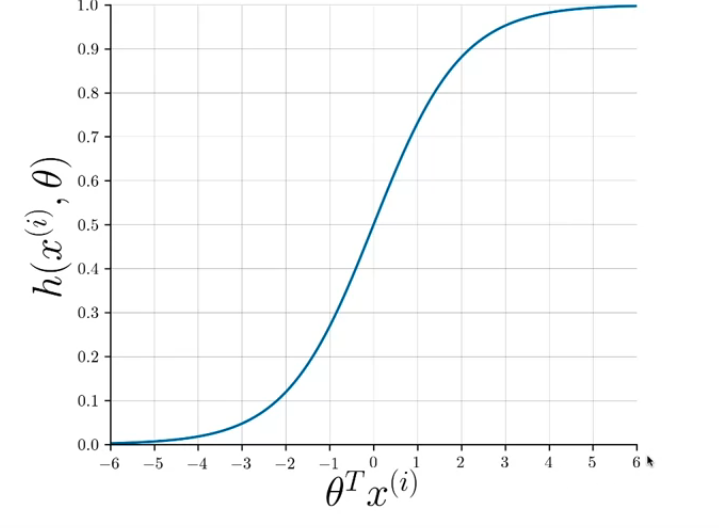

Visualmente, a função sigmoide tem esta forma e se aproxima de zero à medida que o produto escalar de $ \theta^T \mathbf{X} $ se aproxima de menos infinito, e se aproxima de um à medida que se aproxima de infinito.

#### Classificação

Para a classificação, um limiar é necessário. Geralmente, é definido como 0,5, e este valor corresponde a um produto escalar entre $ \theta^T \mathbf{X} $ igual a zero. Portanto, sempre que o produto escalar for maior ou igual a zero, a previsão é positiva, e sempre que o produto escalar for menor que zero, a previsão é negativa.


#### Exemplo no Contexto de Tweets e Análise de Sentimento

Vamos ver um exemplo no contexto familiar dos tweets e análise de sentimento.

1. **Pré-processamento**:
   - Suponha o seguinte tweet:
     - `@YMourri and @AndrewYNG are tuning a GREAT AI model`
   - Após o pré-processamento, você deve obter uma lista assim:
     - `['tun', 'ai', 'great', 'model']`
   - Observe que os handles são deletados, tudo está em minúsculas e as palavras são reduzidas ao seu radical.

2. **Extração de Características**:
   - Usando um dicionário de frequências, você pode extrair características e obter um vetor semelhante ao seguinte:
     $$ x^{(i)} = \begin{bmatrix}
      1 \\
      3476 \\
      245 \\
      \end{bmatrix} $$

     - Onde:
       - `1` é a unidade de viés.
       - `3476` é a soma das frequências positivas.
       - `245` é a soma das frequências negativas.

3. **Previsão**:
   - Assumindo que você já tem um conjunto ótimo de parâmetros $ \theta $, como:
     $$ \theta = \begin{bmatrix}
      0.00003 \\
      0.00150 \\
      -0.00120 \\
      \end{bmatrix} $$

   - Você seria capaz de calcular o valor da função sigmoide. Neste caso, o valor seria `4.92`, e finalmente prever um sentimento positivo.

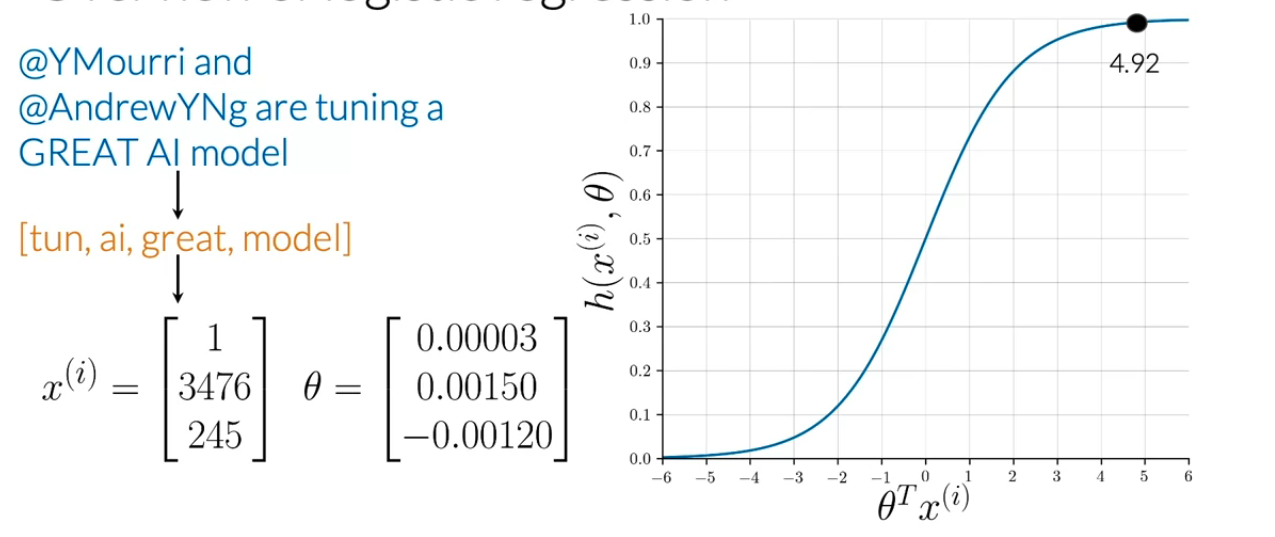

Agora que você conhece a notação para a regressão logística, pode usá-la para treinar um fator de peso $ \theta $.

# Logistic Regression: Training

Para treinar seu classificador de regressão logística, você deve iterar até encontrar o conjunto de parâmetros $\theta$ que minimize sua função de custo. Suponha que sua perda dependa apenas dos parâmetros $\theta_1$ e $\theta_2$. Você teria uma função de custo que se parece com o gráfico de contorno à esquerda. À direita, você pode ver a evolução da função de custo à medida que você itera. Primeiro, você precisaria inicializar seus parâmetros $\theta$. Em seguida, atualizará seu $\theta$ na direção do gradiente da sua função de custo. Após 100 iterações, você estaria neste ponto; após 200 iterações, aqui, e assim por diante. Após muitas iterações, você chegará a um ponto próximo ao custo ótimo e terminará seu treinamento aqui.

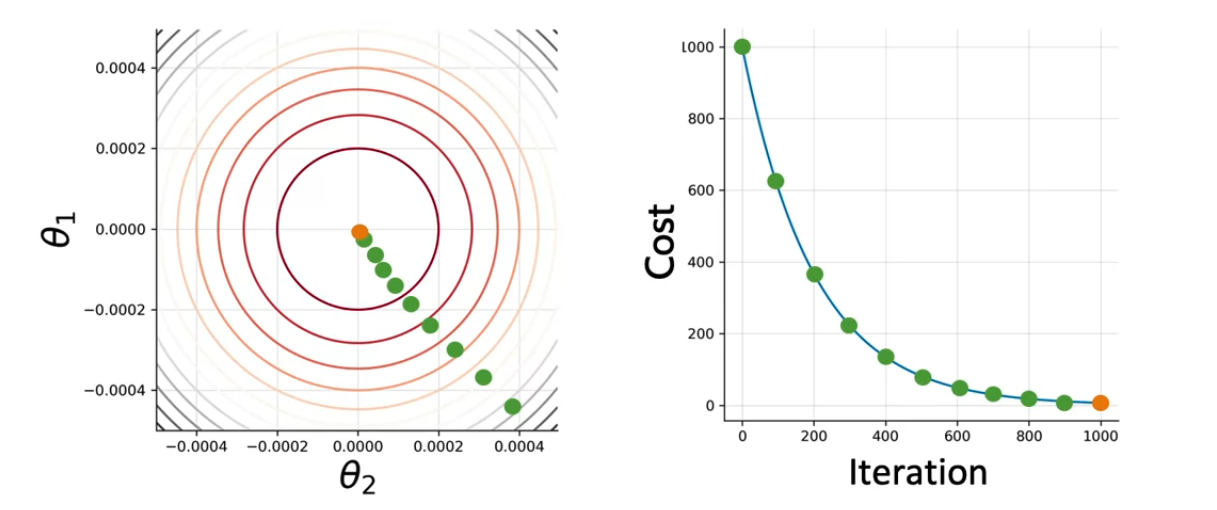

Vamos olhar para este processo em mais detalhes. Primeiro, você precisará inicializar seu vetor de parâmetros $\theta$. Em seguida, usará a função logística para obter valores para cada uma de suas observações. Depois disso, você poderá calcular os gradientes da sua função de custo e atualizar seus parâmetros. Finalmente, você poderá computar seu custo $J$ e determinar se são necessárias mais iterações de acordo com um parâmetro de parada ou o número máximo de iterações. Como você deve ter visto em outros cursos, este algoritmo é conhecido como descida do gradiente.

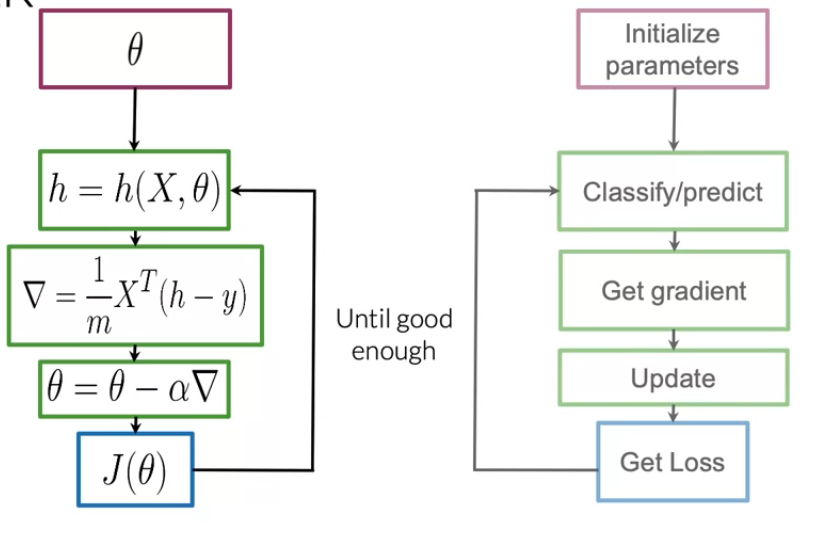

Agora que você tem sua variável $\theta$, você quer avaliá-la, ou seja, avaliar seu classificador. Quando você coloca seu $\theta$ na função sigmoide, você obtém um bom classificador ou um mau classificador?

# LAB-Visualizing tweets

# Visualizando tweets e o modelo de Regressão Logística

**Objetivos:** Visualizar e interpretar o modelo de regressão logística.

**Passos:**
* Plotar tweets em um gráfico de dispersão usando suas somas positivas e negativas.
* Plotar a saída do modelo de regressão logística no mesmo gráfico como uma linha sólida.

## Importando as bibliotecas necessárias

Usaremos o [*NLTK*](http://www.nltk.org/howto/twitter.html), uma biblioteca de NLP open source, para coletar, manipular e processar dados do Twitter. Neste laboratório, usaremos o conjunto de dados de exemplo que acompanha o NLTK. Este conjunto de dados foi anotado manualmente e serve para estabelecer bases de referência para os modelos rapidamente.

Portanto, para começar, vamos importar as bibliotecas necessárias.

In [28]:
import nltk                         # Caixa de ferramentas de NLP
from os import getcwd
import pandas as pd                 # Biblioteca para DataFrames 
from nltk.corpus import twitter_samples 
import matplotlib.pyplot as plt     # Biblioteca para visualização
import numpy as np                  # Biblioteca para funções matemáticas


nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\arthu\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True


## Carregando o conjunto de dados de exemplo do NLTK

In [29]:
# selecionar o conjunto de tweets positivos e negativos
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

tweets = all_positive_tweets + all_negative_tweets  # Concatenar as listas.
labels = np.append(np.ones((len(all_positive_tweets),1)), np.zeros((len(all_negative_tweets),1)), axis = 0)

# dividir os dados em duas partes, uma para treinamento e outra para teste (conjunto de validação)
train_pos  = all_positive_tweets[:4000]
train_neg  = all_negative_tweets[:4000]

train_x = train_pos + train_neg 

print("Number of tweets: ", len(train_x))

Number of tweets:  8000


# Carregar as características extraídas

In [30]:
data = pd.read_csv('logistic_features.csv')  # Carregar um arquivo CSV de 3 colunas usando a função pandas
data.head(10)  # Imprimir as primeiras 10 entradas de dados

bias  positive  negative  sentiment
0   1.0    3020.0      61.0        1.0
1   1.0    3573.0     444.0        1.0
2   1.0    3005.0     115.0        1.0
3   1.0    2862.0       4.0        1.0
4   1.0    3119.0     225.0        1.0
5   1.0    2955.0     119.0        1.0
6   1.0    3934.0     538.0        1.0
7   1.0    3162.0     276.0        1.0
8   1.0     628.0     189.0        1.0
9   1.0     264.0     112.0        1.0

Agora vamos nos livrar do DataFrame para manter apenas arrays Numpy.

# Cada característica é rotulada como bias, positive e negative

In [31]:
X = data[['bias', 'positive', 'negative']].values  # Obter apenas os valores numéricos do DataFrame
Y = data['sentiment'].values  # Colocar em Y os rótulos ou sentimentos correspondentes

print(X.shape)  # Imprimir a forma da parte X
print(X)  # Imprimir algumas linhas de X

(8000, 3)
[[1.000e+00 3.020e+03 6.100e+01]
 [1.000e+00 3.573e+03 4.440e+02]
 [1.000e+00 3.005e+03 1.150e+02]
 ...
 [1.000e+00 1.440e+02 7.830e+02]
 [1.000e+00 2.050e+02 3.890e+03]
 [1.000e+00 1.890e+02 3.974e+03]]


## Carregar um modelo de Regressão Logística pré-treinado

Da mesma forma, como parte da tarefa desta semana, um modelo de regressão logística deve ser treinado. A próxima célula contém o modelo resultante desse treinamento. Observe que uma lista de 3 valores numéricos representa todo o modelo, que chamamos de _theta_ $\theta$.

In [32]:
theta = [6.03518871e-08, 5.38184972e-04, -5.58300168e-04]

## Plotar as amostras em um gráfico de dispersão

O vetor theta representa um plano que divide nosso espaço de características em duas partes. Amostras localizadas acima desse plano são consideradas positivas, e amostras localizadas abaixo desse plano são consideradas negativas. Lembre-se de que temos um espaço de características 3D, ou seja, cada tweet é representado como um vetor composto por três valores: `[bias, positive_sum, negative_sum]`, sempre com `bias = 1`.

Se ignorarmos o termo bias, podemos plotar cada tweet em um plano cartesiano, usando `positive_sum` e `negative_sum`. Na célula abaixo, fazemos exatamente isso. Além disso, colorimos cada tweet, dependendo da sua classe. Tweets positivos serão verdes e tweets negativos serão vermelhos.

Text(0, 0.5, 'Negative')

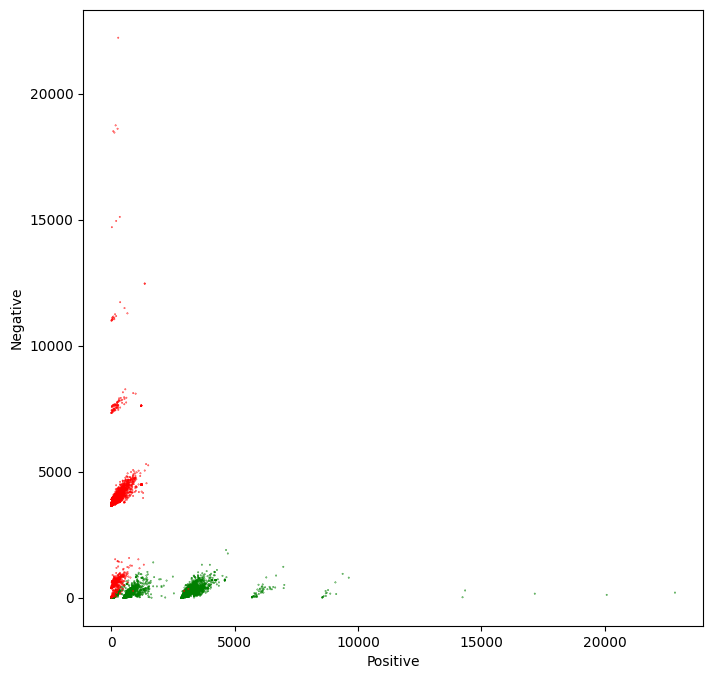

In [33]:
# Plotar as amostras usando as colunas 1 e 2 da matriz
fig, ax = plt.subplots(figsize=(8, 8))

colors = ['red', 'green']

# Colorir com base no sentimento Y
ax.scatter(X[:, 1], X[:, 2], c=[colors[int(k)] for k in Y], s=0.1)  # Plotar um ponto para cada par de palavras
plt.xlabel("Positive")
plt.ylabel("Negative")

A partir do gráfico, é evidente que as características que escolhemos para representar os tweets como vetores numéricos permitem uma separação quase perfeita entre tweets positivos e negativos. Portanto, você pode esperar uma precisão muito alta para este modelo!

## Plotar o modelo junto com os dados

Desenharemos uma linha cinza para mostrar o limite entre as regiões positivas e negativas. Em outras palavras, a linha cinza marca a linha onde $$ z = \theta * x = 0.$$
Para desenhar esta linha, temos que resolver a equação acima em termos de uma das variáveis independentes.

$$ z = \theta * x = 0$$
$$ x = [1, pos, neg] $$
$$ z(\theta, x) = \theta_0 + \theta_1 * pos + \theta_2 * neg = 0 $$
$$ neg = (-\theta_0 - \theta_1 * pos) / \theta_2 $$

As linhas vermelha e verde que apontam na direção do sentimento correspondente são calculadas usando uma linha perpendicular à linha de separação calculada nas equações anteriores (função neg). Ela deve apontar na mesma direção que a derivada da função Logit, mas a magnitude pode diferir. É apenas para uma representação visual do modelo.

$$direction = pos * \theta_2 / \theta_1$$

In [34]:
# Equação para o plano de separação
# Dá um valor no eixo negativo como uma função de um valor positivo
# f(pos, neg, W) = w0 + w1 * pos + w2 * neg = 0
# s(pos, W) = (-w0 - w1 * pos) / w2
def neg(theta, pos):
    return (-theta[0] - pos * theta[1]) / theta[2]

# Equação para a direção da mudança dos sentimentos
# Não nos importamos com a magnitude da mudança. Estamos interessados apenas na direção.
# Então essa direção é apenas uma função perpendicular ao plano de separação
# df(pos, W) = pos * w2 / w1
def direction(theta, pos):
    return pos * theta[2] / theta[1]

A linha verde no gráfico aponta na direção onde z > 0 e a linha vermelha aponta na direção onde z < 0. A direção dessas linhas é dada pelos pesos $\theta_1$ e $\theta_2$.

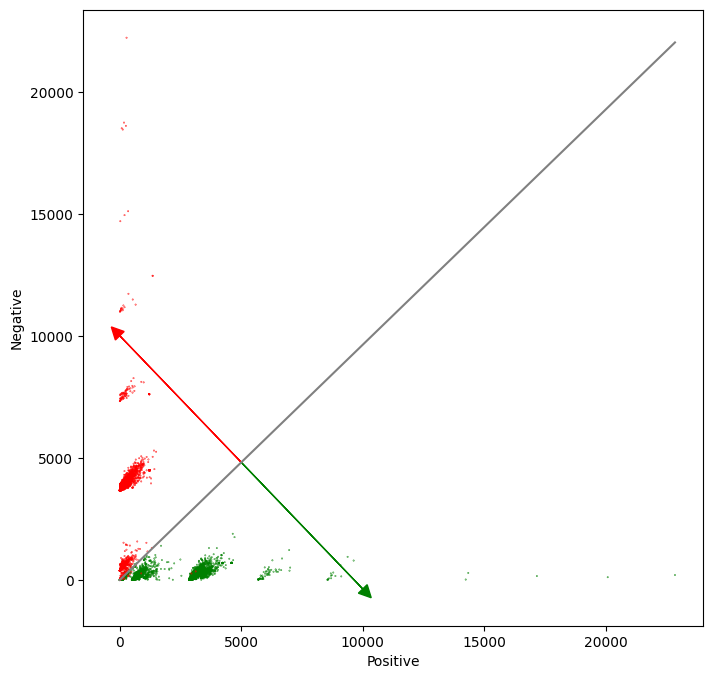

In [35]:
# Plotar as amostras usando as colunas 1 e 2 da matriz
fig, ax = plt.subplots(figsize=(8, 8))

colors = ['red', 'green']

# Colorir com base no sentimento Y
ax.scatter(X[:, 1], X[:, 2], c=[colors[int(k)] for k in Y], s=0.1)  # Plotar um ponto para cada par de palavras
plt.xlabel("Positive")
plt.ylabel("Negative")

# Agora vamos representar o modelo de regressão logística neste gráfico.
maxpos = np.max(X[:, 1])

offset = 5000  # O valor de pos para a origem dos vetores de direção

# Plotar uma linha cinza que divide as 2 áreas.
ax.plot([0, maxpos], [neg(theta, 0), neg(theta, maxpos)], color='gray') 

# Plotar uma linha verde apontando para a direção positiva
ax.arrow(offset, neg(theta, offset), offset, direction(theta, offset), head_width=500, head_length=500, fc='g', ec='g')
# Plotar uma linha vermelha apontando para a direção negativa
ax.arrow(offset, neg(theta, offset), -offset, -direction(theta, offset), head_width=500, head_length=500, fc='r', ec='r')

plt.show()


**Note que mais importante do que a própria regressão logística, são as características extraídas dos tweets que permitem obter os resultados corretos neste exercício.**

# Logistic Regression: Testing

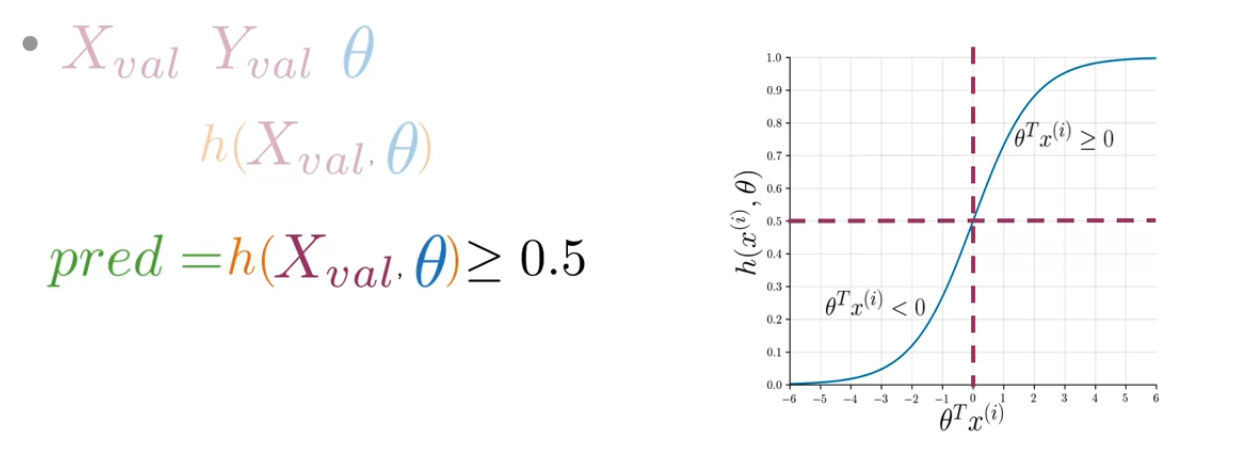

Agora que você tem seu theta, você usará esse theta para prever novos pontos de dados. Por exemplo, dado um novo tweet, você usará esse theta para dizer se esse tweet é positivo ou negativo. Ao fazer isso, você deseja analisar se seu modelo generaliza bem ou não.

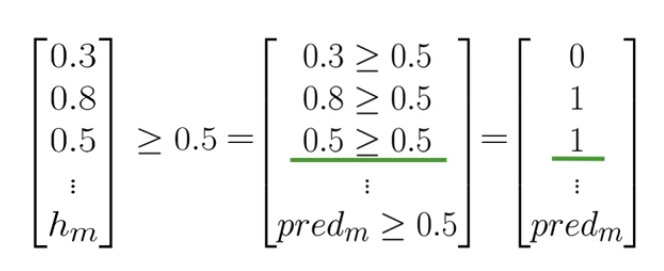

Para isso, você precisará de X_val e Y_val, dados que foram reservados durante o treinamento, também conhecidos como conjuntos de validação, e Theta, o conjunto de parâmetros ótimos que você obteve ao treinar seu modelo. Primeiro, você calculará a função sigmoide para X_val com os parâmetros Theta. Em seguida, você avaliará se cada valor de h de Theta é maior ou igual a um valor de limiar, frequentemente definido como 0,5. Por exemplo, se seu h X Theta for igual ao seguinte vetor: 0,3, 0,8, 0,5, etc., até o número de exemplos do seu conjunto de validação, você verificará se cada um de seus componentes é maior ou igual a 0,5. Então, 0,3 é maior ou igual a 0,5? Não. Portanto, nossa primeira previsão é igual a 0. 0,8 é maior ou igual a 0,5? Sim. Portanto, nossa previsão para o segundo exemplo é 1. 0,5 é maior ou igual a 0,5? Sim. Portanto, nossa terceira previsão é igual a 1, e assim por diante. No final, você terá um vetor preenchido com zeros e uns, indicando exemplos negativos e positivos previstos, respectivamente.

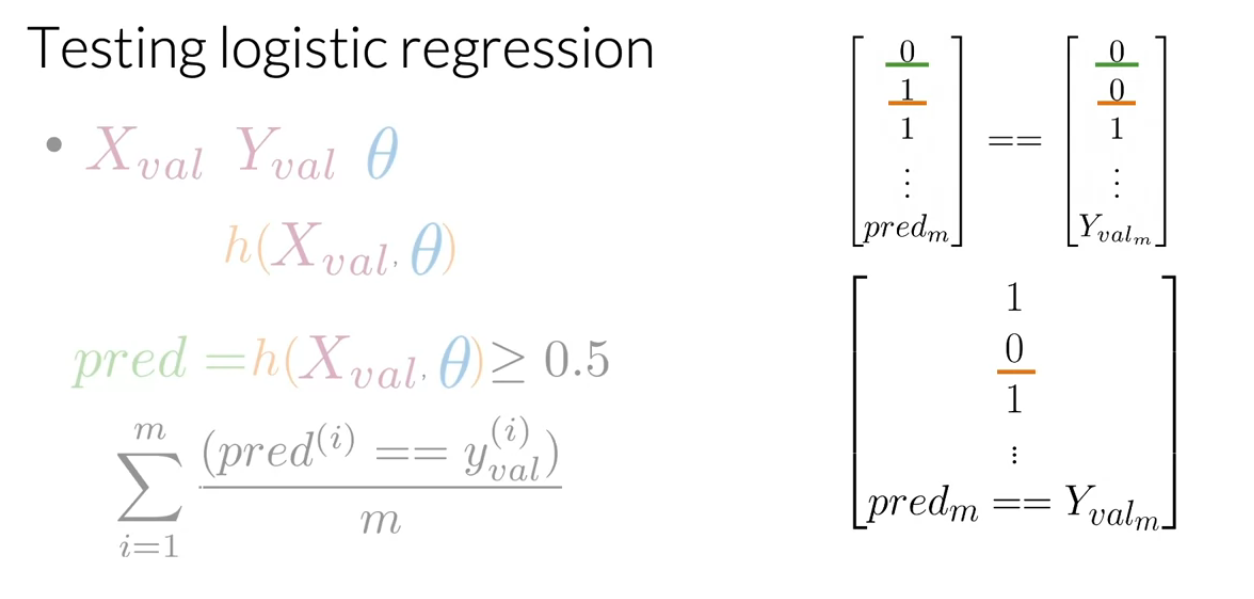

Depois de construir o vetor de previsões, você pode calcular a precisão do seu modelo nos conjuntos de validação. Para fazer isso, você comparará as previsões que fez com o valor verdadeiro de cada observação do seu conjunto de validação. Se os valores forem iguais e sua previsão estiver correta, você receberá um valor de 1; caso contrário, será 0. Por exemplo, se sua previsão estiver correta, como neste caso em que sua previsão e seu rótulo são ambos iguais a 0, seu vetor terá um valor igual a 1 na primeira posição. Por outro lado, se sua segunda previsão não estiver correta, porque sua previsão e o rótulo não concordam, seu vetor terá um valor de 0 na segunda posição e assim por diante.

Depois de comparar os valores de todas as previsões com os rótulos verdadeiros do seu conjunto de validação, você pode obter o número total de vezes que suas previsões estavam corretas somando o vetor das comparações. Finalmente, você dividirá esse número pelo número total m de observações dos seus conjuntos de validação. Essa métrica fornece uma estimativa das vezes que sua regressão logística funcionará corretamente em dados não vistos. Portanto, se sua precisão for igual a 0,5, significa que 50% das vezes seu modelo deverá funcionar bem. Por exemplo, se seus vetores Y_val e de previsões para cinco observações forem assim, você comparará cada um de seus valores e determinará se eles correspondem ou não. Depois disso, você terá o seguinte vetor com um único 0 na terceira posição, onde a previsão e o rótulo discordam. Em seguida, você soma o número de vezes que suas previsões estavam corretas e divide esse número pelo número total de observações nos seus conjuntos de validação. Por exemplo, você obtém uma precisão igual a 80%.

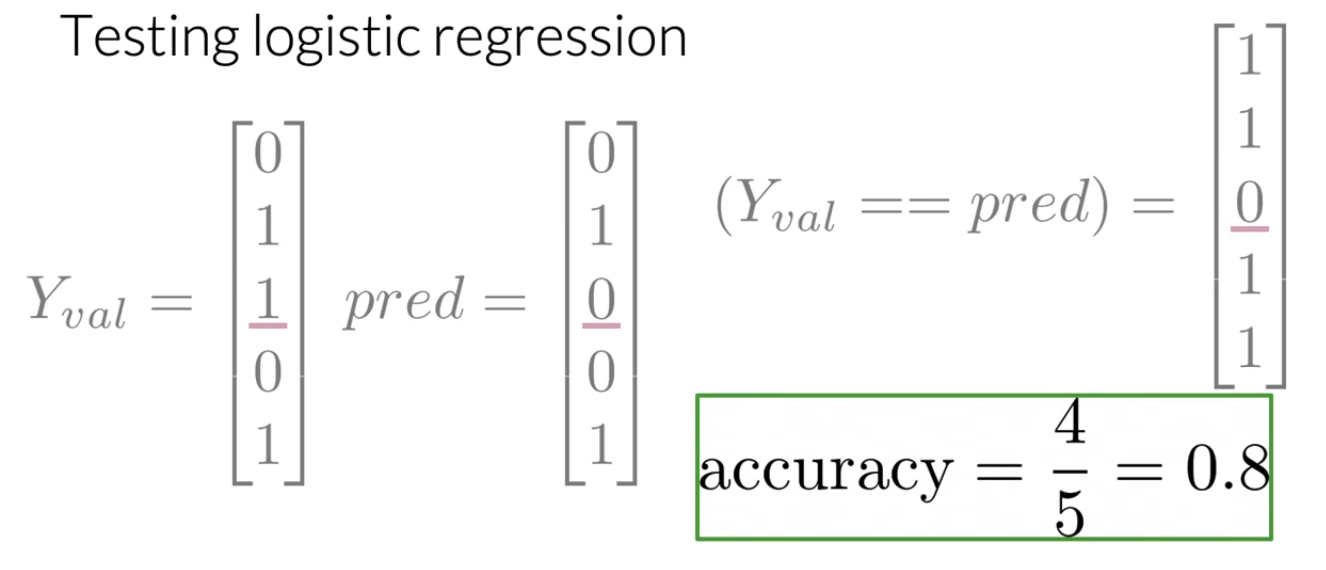

# Logistic Regression: Cost Function

Vamos agora dar uma olhada na equação da função de custo. Embora possa parecer uma equação grande e complicada, na verdade é bastante simples, uma vez que você a divide em seus componentes. Primeiro, observe o lado esquerdo da equação, onde você encontra uma soma sobre a variável $ m $, que é apenas o número de exemplos de treinamento no seu conjunto de treinamento. Isso indica que você vai somar o custo de cada exemplo de treinamento. Na frente, há um $-1/m$, indicando que, quando combinado com a soma, isso será uma espécie de média. O sinal de menos garante que seus custos totais sempre serão um número positivo. Dentro dos colchetes, a equação tem dois termos que são somados. Para considerar o que cada um desses termos contribui para a função de custo de cada exemplo de treinamento, vamos dar uma olhada em cada um deles separadamente.

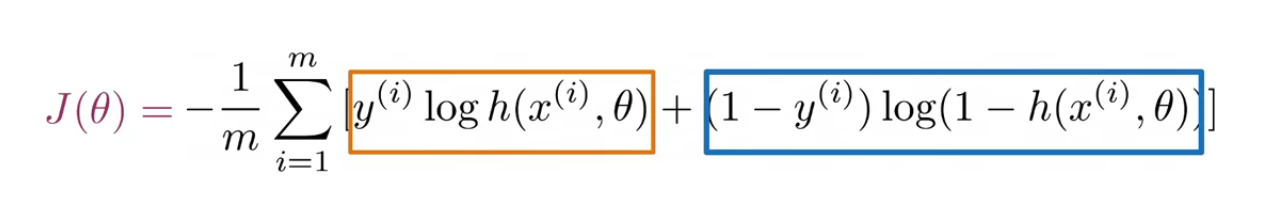

O termo à esquerda é o produto de $ y^{(i)} $, que é o rótulo de cada exemplo de treinamento, multiplicado pelo logaritmo da previsão, que é a função de regressão logística aplicada a cada exemplo de treinamento. Representada como $ h^{(i)} $ e um parâmetro $ \theta $.

Agora, considere o caso em que seu rótulo é 0. Neste caso, a função $ h $ pode retornar qualquer valor, e o termo inteiro será 0 porque 0 vezes qualquer coisa é apenas 0. E quanto ao caso em que seu rótulo é 1? Se sua previsão estiver próxima de 1, então o logaritmo da sua previsão estará próximo de 0, porque, como você deve se lembrar, o logaritmo de 1 é 0. E o produto também estará próximo de 0. Se seu rótulo for 1 e sua previsão estiver próxima de 0, então esse termo explode e se aproxima do infinito negativo. Intuitivamente, agora, você pode ver que este é o termo relevante na sua função de custo quando seu rótulo é 1. Quando sua previsão está próxima do valor do rótulo, a perda é pequena, e quando seu rótulo e previsão discordam, o custo total aumenta.

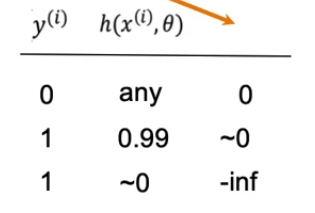

Agora, considere o termo do lado direito da equação da função de custo. Nesse caso, se seu rótulo for 1, então o termo $1 - y$ vai para 0. E assim, qualquer valor retornado pela função de regressão logística resultará em 0 para o termo inteiro, porque, novamente, 0 vezes qualquer coisa é apenas 0. Se seu rótulo for 0 e a função de regressão logística retornar um valor próximo de 0, então os produtos nesse termo novamente estarão próximos de 0. Se, por outro lado, seu rótulo for 0 e sua previsão estiver próxima de 1, então o termo logaritmo explodirá e o termo geral se aproximará do infinito negativo.

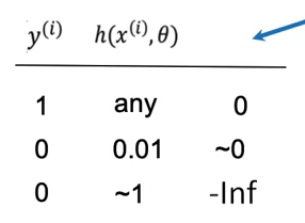

Dessa maneira, você pode ver que há um termo na função de custo que é relevante quando seu rótulo é 0 e outro que é relevante quando o rótulo é 1. Em cada um desses termos, você está tomando o logaritmo de um valor entre 0 e 1, o que sempre retornará um número negativo, e por isso o sinal de menos na frente garante que o custo total sempre será um número positivo. Agora, vamos dar uma olhada em como a função de custo se parece para cada um dos rótulos 0 e 1, em todos os valores de previsão possíveis. Primeiro, vamos olhar para a perda quando o rótulo é 1. Nesse gráfico, você tem seu valor de previsão no eixo horizontal e o custo associado a um único exemplo de treinamento no eixo vertical. Nesse caso, $J(\theta)$ se simplifica para apenas $-\log(h(x^{(\theta)}))$. Quando sua previsão está próxima de 1, a perda está próxima de 0, porque sua previsão concorda bem com o rótulo. E quando a previsão está próxima de 0, a perda se aproxima do infinito, porque sua previsão e o rótulo discordam fortemente. O oposto é verdadeiro quando o rótulo é 0. Nesse caso, $J(\theta)$ se reduz a apenas $-\log(1 - h(x^{(\theta)}))$. Agora, quando sua previsão está próxima de 0, a perda também está próxima de 0. E quando sua previsão está próxima de 1, a perda se aproxima do infinito. 

# Logistic Regression

## Importar Funções e Dados

In [36]:
import nltk
from os import getcwd
import numpy as np
import pandas as pd
from nltk.corpus import twitter_samples 

nltk.download('twitter_samples')
nltk.download('stopwords')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\arthu\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arthu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Preparar os Dados
* O `twitter_samples` contém subconjuntos de cinco mil tweets positivos, cinco mil tweets negativos e o conjunto completo de 10.000 tweets.
    * Se você usar os três conjuntos de dados, introduzirá duplicatas dos tweets positivos e negativos.
    * Você selecionará apenas os cinco mil tweets positivos e cinco mil tweets negativos.

selecione o conjunto de tweets positivos e negativos

In [37]:
# seleciona o conjunto de tweets positivos e negativos
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

* Divisão treino-teste: 20% será para o conjunto de teste e 80% para o conjunto de treino.


In [38]:
# divide os dados em duas partes, uma para treino e outra para teste (conjunto de validação)
test_pos = all_positive_tweets[4000:]
train_pos = all_positive_tweets[:4000]
test_neg = all_negative_tweets[4000:]
train_neg = all_negative_tweets[:4000]

train_x = train_pos + train_neg 
test_x = test_pos + test_neg

* Crie o array numpy de rótulos positivos e rótulos negativos.

In [39]:
train_y = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
test_y = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)

In [40]:
# Imprime as formas dos conjuntos de treino e teste
print("train_y.shape = " + str(train_y.shape))
print("test_y.shape = " + str(test_y.shape))

train_y.shape = (8000, 1)
test_y.shape = (2000, 1)


### Cria o dicionário de frequência usando a função importada build_freqs

```python
for y, tweet in zip(ys, tweets):
    for word in process_ttweet(tweet):
        pair = (word, y)
        if pair in freqs:
            freqs[pair] += 1
        else:
            freqs[pair] = 1
```
* Observe como o loop externo percorre cada tweet, e o loop interno percorre cada palavra em um tweet.
* O dicionário 'freqs' é o dicionário de frequência que está sendo construído.
* A chave é a tupla (word, label), como ("happy",1) ou ("happy",0). O valor armazenado para cada chave é a contagem de quantas vezes a palavra "happy" foi associada a um rótulo positivo ou a um rótulo negativo.

In [41]:
# cria o dicionário de frequência
freqs = build_freqs(train_x, train_y)

# verifica a saída
print("type(freqs) = " + str(type(freqs)))
print("len(freqs) = " + str(len(freqs.keys())))

type(freqs) = <class 'dict'>
len(freqs) = 11428


### Processar Tweet
A função dada 'process_tweet' tokeniza o tweet em palavras individuais, remove stop words e aplica stemming.

In [49]:
print('Exemplo de um tweet positivo: \n', train_x[0])
print('\nTweet processado: \n', process_tweet(train_x[0]))

Exemplo de um tweet positivo: 
 #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)

Tweet processado: 
 ['followfriday', 'top', 'engag', 'member', 'commun', 'week', ':)']


## Regressão Logística 

### Sigmóide

* A função sigmóide é definida como: 

$$ h(z) = \frac{1}{1+\exp^{-z}} \tag{1}$$

Ela mapeia a entrada 'z' para um valor que varia entre 0 e 1 e, portanto, pode ser tratada como uma probabilidade.

In [43]:
def sigmoid(z): 
    '''
    Entrada:
        z: é a entrada (pode ser um escalar ou um array)
    Saída:
        h: o sigmóide de z
    '''
    # calcula o sigmóide de z
    h = 1/(1+np.exp(-z))
    return h


### Regressão Logística: Regressão e uma Sigmóide

A regressão logística pega uma regressão linear regular e aplica uma sigmóide à saída da regressão linear.

Regressão:
$$z = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_N x_N$$
Note que os valores de $\theta$ são "pesos".

Regressão logística:
$$ h(z) = \frac{1}{1+\exp^{-z}}$$
$$z = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_N x_N$$
Vamos nos referir a 'z' como os 'logits'.

### Função de Custo e Gradiente

A função de custo usada para a regressão logística é a média da perda logarítmica em todos os exemplos de treinamento:

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^m \left[ y^{(i)}\log \left( h(z(\theta)^{(i)}) \right) + (1-y^{(i)})\log \left( 1-h(z(\theta)^{(i)}) \right) \right]\tag{5} $$
* $m$ é o número de exemplos de treinamento.
* $y^{(i)}$ é o rótulo real do exemplo de treinamento 'i'.
* $h(z^{(i)})$ é a previsão do modelo para o exemplo de treinamento 'i'.

A função de perda para um único exemplo de treinamento é:
$$ Loss = -1 \times \left( y^{(i)}\log \left( h(z(\theta)^{(i)}) \right) + (1-y^{(i)})\log \left( 1-h(z(\theta)^{(i)}) \right) \right)$$

* Todos os valores de $h$ estão entre 0 e 1, então os logaritmos serão negativos. Por isso, é aplicado o fator -1 à soma dos dois termos de perda.
* Note que quando o modelo prevê 1 ($h(z(\theta)) = 1$) e o rótulo 'y' também é 1, a perda para aquele exemplo de treinamento é 0. 
* Da mesma forma, quando o modelo prevê 0 ($h(z(\theta)) = 0$) e o rótulo real também é 0, a perda para aquele exemplo de treinamento é 0. 
* No entanto, quando a previsão do modelo está próxima de 1 ($h(z(\theta)) = 0.9999$) e o rótulo é 0, o segundo termo da perda logarítmica se torna um número negativo grande, que é então multiplicado pelo fator geral de -1 para convertê-lo em um valor de perda positivo. $-1 \times (1 - 0) \times \log(1 - 0.9999) \approx 9.2$. Quanto mais próxima a previsão do modelo chegar a 1, maior será a perda.

In [44]:
# Verifique que quando o modelo prevê próximo a 1, mas o rótulo real é 0, a perda é um valor positivo grande
-1 * (1 - 0) * np.log(1 - 0.9999) # perda é aproximadamente 9.2

9.210340371976294

* Da mesma forma, se o modelo prevê próximo de 0 ($h(z) = 0.0001$) mas o rótulo real é 1, o primeiro termo na função de perda se torna um número grande: $-1 \times \log(0.0001) \approx 9.2$. Quanto mais próxima a previsão estiver de zero, maior será a perda.

In [45]:
# Verifique que quando o modelo prevê próximo a 0 mas o rótulo real é 1, a perda é um valor positivo grande
-1 * np.log(0.0001) # perda é aproximadamente 9.2

9.210340371976182

#### Atualizar os pesos

Para atualizar seu vetor de pesos $\theta$, você aplicará o método de descida de gradiente para melhorar iterativamente as previsões do seu modelo.  
O gradiente da função de custo $J$ em relação a um dos pesos $\theta_j$ é:

$$\nabla_{\theta_j}J(\theta) = \frac{1}{m} \sum_{i=1}^m(h^{(i)}-y^{(i)})x^{(i)}_j \tag{5}$$
* 'i' é o índice em todos os exemplos de treinamento 'm'.
* 'j' é o índice do peso $\theta_j$, então $x^{(i)}_j$ é a característica associada ao peso $\theta_j$.

* Para atualizar o peso $\theta_j$, ajustamos subtraindo uma fração do gradiente determinada por $\alpha$:
$$\theta_j = \theta_j - \alpha \times \nabla_{\theta_j}J(\theta) $$
* A taxa de aprendizado $\alpha$ é um valor que escolhemos para controlar o tamanho de cada atualização.


### gradientDescent


* O número de iterações 'num_iters' é o número de vezes que você usará todo o conjunto de treinamento.
* Para cada iteração, você calculará a função de custo usando todos os exemplos de treinamento (há 'm' exemplos de treinamento) e para todas as características.
* Em vez de atualizar um único peso $\theta_i$ de cada vez, podemos atualizar todos os pesos no vetor coluna:
$$\mathbf{\theta} = \begin{pmatrix}
\theta_0
\\
\theta_1
\\ 
\theta_2 
\\ 
\vdots
\\ 
\theta_n
\end{pmatrix}$$
* $\mathbf{\theta}$ tem dimensões (n+1, 1), onde 'n' é o número de características, e há um elemento a mais para o termo de viés $\theta_0$ (note que o valor da característica correspondente $\mathbf{x_0}$ é 1).
* Os 'logits', 'z', são calculados multiplicando a matriz de características 'x' pelo vetor de pesos 'theta'.  $z = \mathbf{x}\mathbf{\theta}$
    * $\mathbf{x}$ tem dimensões (m, n+1) 
    * $\mathbf{\theta}$: tem dimensões (n+1, 1)
    * $\mathbf{z}$: tem dimensões (m, 1)
* A previsão 'h' é calculada aplicando a função sigmoid a cada elemento em 'z': $h(z) = sigmoid(z)$, e tem dimensões (m,1).
* A função de custo $J$ é calculada tomando o produto escalar dos vetores 'y' e 'log(h)'.  Como ambos 'y' e 'h' são vetores coluna (m,1), transponha o vetor à esquerda, de modo que a multiplicação de matrizes de um vetor linha com um vetor coluna realize o produto escalar.
$$J = \frac{-1}{m} \times \left(\mathbf{y}^T \cdot \log(\mathbf{h}) + \mathbf{(1-y)}^T \cdot \log(\mathbf{1-h}) \right)$$
* A atualização de theta também é vetorizada.  Como as dimensões de $\mathbf{x}$ são (m, n+1), e tanto $\mathbf{h}$ quanto $\mathbf{y}$ são (m, 1), precisamos transpor o $\mathbf{x}$ e colocá-lo à esquerda para realizar a multiplicação de matrizes, o que resulta na resposta (n+1, 1) que precisamos:
$$\mathbf{\theta} = \mathbf{\theta} - \frac{\alpha}{m} \times \left( \mathbf{x}^T \cdot \left( \mathbf{h-y} \right) \right)$$

In [46]:
def gradientDescent(x, y, theta, alpha, num_iters):
    '''
    Input:
        x: matriz de características com dimensões (m, n+1)
        y: rótulos correspondentes à matriz de entrada x, dimensões (m,1)
        theta: vetor de pesos com dimensões (n+1,1)
        alpha: taxa de aprendizado
        num_iters: número de iterações para treinar o modelo
    Output:
        J: o custo final
        theta: seu vetor de pesos final
    Dica: pode ser útil imprimir o custo para garantir que ele esteja diminuindo.
    '''
    
    # obtenha 'm', o número de linhas na matriz x
    m = x.shape[0]
    
    for i in range(num_iters):
        
        # obtenha z, o produto escalar de x e theta
        z = np.dot(x, theta)
        
        # obtenha a sigmoid de z
        h = sigmoid(z)
        
        # calcule a função de custo
        J = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

        # atualize os pesos theta
        theta = theta - alpha * (np.dot(x.T, (h - y)) / m)
        
    J = float(J)
    return J, theta


## Extraindo as Características

* Dada uma lista de tweets, extraia as características e armazene-as em uma matriz. Você vai extrair duas características:
    * A primeira característica é o número de palavras positivas em um tweet.
    * A segunda característica é o número de palavras negativas em um tweet.
* Em seguida, treine seu classificador de regressão logística com essas características.
* Teste o classificador em um conjunto de validação.

### Implementação
* Esta função recebe um único tweet.
* Processe o tweet usando a função importada `process_tweet` e salve a lista de palavras do tweet.
* Percorra cada palavra na lista de palavras processadas:
    * Para cada palavra, verifique o dicionário 'freqs' para a contagem quando essa palavra tem um rótulo positivo '1'. (Verifique a chave (word, 1.0))
    * Faça o mesmo para a contagem de quando a palavra está associada ao rótulo negativo '0'. (Verifique a chave (word, 0.0)).

In [47]:
def extract_features(tweet, freqs, process_tweet=process_tweet):
    '''
    Entrada: 
        tweet: uma string contendo um tweet
        freqs: um dicionário correspondente às frequências de cada tupla (palavra, rótulo)
    Saída: 
        x: um vetor de características de dimensão (1,3)
    '''
    # process_tweet tokeniza, aplica stem e remove stopwords
    word_l = process_tweet(tweet)
    
    # 3 elementos para [viés, contagem de positivas, contagem de negativas]
    x = np.zeros(3) 
    
    # o termo de viés é definido como 1
    x[0] = 1 
    
    # percorre cada palavra na lista de palavras
    for word in word_l:
        
        # incrementa a contagem de palavras para o rótulo positivo 1
        if (word, 1) in freqs:
            x[1] += freqs[(word, 1)]
        
        # incrementa a contagem de palavras para o rótulo negativo 0
        if (word, 0) in freqs:
            x[2] += freqs[(word, 0)]
        
  
    
    x = x[None, :]  # adiciona a dimensão de lote para processamento adicional
    assert(x.shape == (1, 3))
    return x

## Treinando Seu Modelo

Para treinar o modelo:
* Empilhe as características de todos os exemplos de treinamento em uma matriz X.
* Chame `gradientDescent`, que você implementou acima.

In [48]:
# colete as características 'x' e empilhe-as em uma matriz 'X'
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], freqs)

# rótulos de treinamento correspondentes a X
Y = train_y

# Aplicar o gradiente descendente
J, theta = gradientDescent(X, Y, np.zeros((3, 1)), 1e-9, 1500)
print(f"O custo após o treinamento é {J:.8f}.")
print(f"O vetor de pesos resultante é {[round(t, 8) for t in np.squeeze(theta)]}")

O custo após o treinamento é 0.22521260.
O vetor de pesos resultante é [6e-08, 0.0005382, -0.0005583]


## Teste sua Regressão Logística

É hora de testar sua função de regressão logística em algumas entradas novas que seu modelo ainda não viu antes. 

### predict_tweet

* Dado um tweet, processe-o e extraia as características.
* Aplique os pesos aprendidos do modelo nas características para obter os logits.
* Aplique a função sigmoide nos logits para obter a previsão (um valor entre 0 e 1).

$$y_{pred} = sigmoid(\mathbf{x} \cdot \theta)$$

In [50]:
def predict_tweet(tweet, freqs, theta):
    '''
    Entrada: 
        tweet: uma string
        freqs: um dicionário correspondente às frequências de cada tupla (palavra, rótulo)
        theta: vetor de pesos (3,1)
    Saída: 
        y_pred: a probabilidade de um tweet ser positivo ou negativo
    '''
    # extrair as características do tweet e armazená-las em x
    x = extract_features(tweet, freqs, process_tweet=process_tweet)
    
    # fazer a previsão usando x e theta
    y_pred = sigmoid(np.dot(x, theta))
    
    return y_pred

In [51]:
for tweet in ['I am happy', 'I am bad', 'this movie should have been great.', 'great', 'great great', 'great great great', 'great great great great']:
    print( '%s -> %f' % (tweet, predict_tweet(tweet, freqs, theta))) 

I am happy -> 0.519275
I am bad -> 0.494347
this movie should have been great. -> 0.515980
great -> 0.516065
great great -> 0.532097
great great great -> 0.548063
great great great great -> 0.563930


### Verifique o Desempenho usando o Conjunto de Teste

Depois de treinar seu modelo usando o conjunto de treinamento acima, verifique como seu modelo pode se sair em dados reais e não vistos, testando-o contra o conjunto de teste.


### test_logistic_regression

* Dado os dados de teste e os pesos do seu modelo treinado, calcule a precisão do seu modelo de regressão logística. 
* Use sua função 'predict_tweet' para fazer previsões em cada tweet do conjunto de teste.
* Se a previsão for > 0.5, defina a classificação do modelo 'y_hat' como 1, caso contrário, defina a classificação do modelo 'y_hat' como 0.
* Uma previsão é precisa quando o y_hat é igual ao test_y. Some todas as instâncias quando elas são iguais e divida por m.


In [52]:
def test_logistic_regression(test_x, test_y, freqs, theta, predict_tweet=predict_tweet):
    """
    Entrada: 
        test_x: uma lista de tweets
        test_y: vetor (m, 1) com os rótulos correspondentes para a lista de tweets
        freqs: um dicionário com a frequência de cada par (ou tupla)
        theta: vetor de pesos de dimensão (3, 1)
    Saída: 
        accuracy: (# de tweets classificados corretamente) / (total # de tweets)
    """
    
    # lista para armazenar as previsões
    y_hat = []
    
    for tweet in test_x:
        # obter a previsão do rótulo para o tweet
        y_pred = predict_tweet(tweet, freqs, theta)
        
        if y_pred > 0.5:
            # adicionar 1.0 à lista
            y_hat.append(1.0)
        else:
            # adicionar 0 à lista
            y_hat.append(0.0)

    # Com a implementação acima, y_hat é uma lista, mas test_y é um array (m, 1)
    # converta ambos para arrays unidimensionais para compará-los usando o operador '=='
    y_hat = np.array(y_hat)
    accuracy = np.sum(y_hat == test_y.squeeze()) / len(y_hat)
    
    return accuracy

In [53]:
tmp_accuracy = test_logistic_regression(test_x, test_y, freqs, theta)
print(f"A precisão do modelo de regressão logística é = {tmp_accuracy:.4f}")

A precisão do modelo de regressão logística é = 0.9950


## Análise de Erros

Nesta parte, você verá alguns tweets que seu modelo classificou incorretamente. Por que você acha que essas classificações incorretas aconteceram? Especificamente, que tipo de tweets seu modelo classifica incorretamente?


In [54]:
# Análise de erros feita para você
print('Rótulo Previsão Tweet')
for x, y in zip(test_x, test_y):
    y_hat = predict_tweet(x, freqs, theta)

    if np.abs(y - (y_hat > 0.5)) > 0:
        print('O TWEET É:', x)
        print('O TWEET PROCESSADO É:', process_tweet(x))
        print('%d\t%0.8f\t%s' % (y, y_hat, ' '.join(process_tweet(x)).encode('ascii', 'ignore')))

Rótulo Previsão Tweet
O TWEET É: @MarkBreech Not sure it would be good thing 4 my bottom daring 2 say 2 Miss B but Im gonna be so stubborn on mouth soaping ! #NotHavingit :p
O TWEET PROCESSADO É: ['sure', 'would', 'good', 'thing', '4', 'bottom', 'dare', '2', 'say', '2', 'miss', 'b', 'im', 'gonna', 'stubborn', 'mouth', 'soap', 'nothavingit', ':p']
1	0.48942982	b'sure would good thing 4 bottom dare 2 say 2 miss b im gonna stubborn mouth soap nothavingit :p'
O TWEET É: I'm playing Brain Dots : ) #BrainDots
http://t.co/UGQzOx0huu
O TWEET PROCESSADO É: ["i'm", 'play', 'brain', 'dot', 'braindot']
1	0.48418982	b"i'm play brain dot braindot"
O TWEET É: I'm playing Brain Dots : ) #BrainDots http://t.co/aOKldo3GMj http://t.co/xWCM9qyRG5
O TWEET PROCESSADO É: ["i'm", 'play', 'brain', 'dot', 'braindot']
1	0.48418982	b"i'm play brain dot braindot"
O TWEET É: I'm playing Brain Dots : ) #BrainDots http://t.co/R2JBO8iNww http://t.co/ow5BBwdEMY
O TWEET PROCESSADO É: ["i'm", 'play', 'brain', 'dot', 'bra

## Prever com seu próprio Tweet

In [56]:
meu_tweet = 'This is a ridiculously bright movie. The plot was terrible and I was sad until the ending!'
print(process_tweet(meu_tweet))
y_hat = predict_tweet(meu_tweet, freqs, theta)
print(y_hat)
if y_hat > 0.5:
    print('Sentimento positivo')
else: 
    print('Sentimento negativo')

['ridicul', 'bright', 'movi', 'plot', 'terribl', 'sad', 'end']
[[0.48125421]]
Sentimento negativo
